In [2]:
import math
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import os
from collections import defaultdict
from itertools import chain, combinations
import random

In [67]:
## Load data
collision = pd.read_csv('/collision_new.csv')
collision.head()

C:\Users\meera\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (25,26,27,28,29,35,39,66,78,79,91) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,c_document_id,d_file_date,c_incident_rpt_cde,c_invst_complete_cde,c_invst_at_scene_cde,c_photograph_cde,c_revision_cde,c_coll_fatality_cde,c_coll_hit_run_cde,t_report_agency_nme,...,unsafe_unit_c_unsafe_unlaw_cde,road_depart,derived_lat,derived_lon,ambiguity,acog,speed_limit,traffic_sgl,tribal,cross_center
0,300430484,2020-01-03 00:00:00,N,Y,Y,N,N,N,N,OKLAHOMA HIGHWAY PATROL,...,27.0,1,36.704906,-96.684741,NaN,0,65,99,4,0
1,300430482,2020-01-03 00:00:00,N,Y,Y,N,N,N,N,OKLAHOMA HIGHWAY PATROL,...,65.0,1,36.660547,-96.313913,NaN,0,65,99,4,0
2,300430481,2020-01-03 00:00:00,N,Y,Y,N,N,N,N,OKLAHOMA HIGHWAY PATROL,...,19.0,0,35.456979,-97.490534,NaN,1,60,99,31,0
3,300430479,2020-01-03 00:00:00,N,Y,Y,N,N,N,N,OKLAHOMA HIGHWAY PATROL,...,71.0,1,35.252881,-96.458947,NaN,0,65,99,16,0
4,300430478,2020-01-03 00:00:00,N,Y,Y,N,N,N,N,OKLAHOMA HIGHWAY PATROL,...,14.0,0,35.524833,-97.531310,NaN,1,60,99,31,0


In [68]:
#########Changing weather condition data to category
collision['c_weather_cond_cde']=collision['c_weather_cond_cde'].replace([ 1,  3,  4,  2, 99, 10,  7,  6,  5,  9,  8],
                                        ['Clear', 'Clouds Present', 'Raining', 'Fog','Unknown','Other','Severe Crosswind','Sleet/Hail','Snowing','Blowing Sand/Dirt','Blowing Snow'])

collision['c_weather_cond_cde'] = collision['c_weather_cond_cde'].astype('category')
collision['c_weather_cond_cde'].dtype
collision['c_weather_cond_cde'].unique()

[Clear, Clouds Present, Raining, Fog, Unknown, ..., Severe Crosswind, Sleet/Hail, Snowing, Blowing Sand/Dirt, Blowing Snow]
Length: 11
Categories (11, object): [Clear, Clouds Present, Raining, Fog, ..., Sleet/Hail, Snowing, Blowing Sand/Dirt, Blowing Snow]

In [69]:
#########Changing light condition data to category

collision['c_light_cond_cde']=collision['c_light_cond_cde'].replace([1, 2, 3, 4, 5, 6, 7, 9],
                                                                    ['Daylight','Dark-Not Lighted','Dark-Lighted','Dawn','Dusk','Dark-Unkown Lighting','Other','Unknown'])
collision['c_light_cond_cde'] = collision['c_light_cond_cde'].astype('category')
collision['c_light_cond_cde'].dtype
collision['c_light_cond_cde'].unique()

[Daylight, Dark-Not Lighted, Dark-Lighted, Dusk, Dawn, Unknown, Dark-Unkown Lighting, Other]
Categories (8, object): [Daylight, Dark-Not Lighted, Dark-Lighted, Dusk, Dawn, Unknown, Dark-Unkown Lighting, Other]

In [70]:
collision['veh1_c_roadway_cond_cde']=collision['veh1_c_roadway_cond_cde'].replace([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,9.0,10.0,99.0],
                                                                    ['Dry','Wet','Ice/Frost','Snow',
                                                                     'Mud, Dirt, Gravel','Slush','Water','Sand',
                                                                     'Oil','Other','Unknown'])
collision['veh1_c_roadway_cond_cde'] = collision['veh1_c_roadway_cond_cde'].astype('category')
collision['veh1_c_roadway_cond_cde'].dtype
collision['veh1_c_roadway_cond_cde'].unique()

[Dry, Wet, Mud, Dirt, Gravel, Unknown, Other, ..., Ice/Frost, Sand, Snow, Oil, Slush]
Length: 12
Categories (11, object): [Dry, Wet, Mud, Dirt, Gravel, Unknown, ..., Sand, Snow, Oil, Slush]

In [71]:
collision['veh1_c_vehicle_type_cde']=collision['veh1_c_vehicle_type_cde'].replace([0.0,1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,99.0],
                                                                    ['Not Applicable','Passenger Vehicle-2 Door','Passenger Vehicle-4 Door','Passenger Vehicle-Convertible',
                                                                     'Pickup Truck','Single-Unit Truck (2 axles)','Single-Unit Truck (3 or more axles)','School Bus',
                                                                     'Truck/Trailer','Truck-Tractor (bobtail)','Truck-Tractor/Semi-Trailer','Truck-Tractor/Double',
                                                                     'Truck-Tractor/Triple','Bus/Large Van (9-15 seats)','Bus (16+ seats)','Motorcycle','Motor Scooter/Moped',
                                                                     'Motor Home','Farm Machinery','ATV','Sport Utility Vehicle (SUV)','Passenger Van','Truck More Than 10,000 lbs., Cannot Classify',
                                                                     'Van (10,000 lbs. or less)','Other','Unknown'])
collision['veh1_c_vehicle_type_cde'] = collision['veh1_c_vehicle_type_cde'].astype('category')
collision['veh1_c_vehicle_type_cde'].dtype
collision['veh1_c_vehicle_type_cde'].unique()

[Passenger Vehicle-4 Door, Pickup Truck, Sport Utility Vehicle (SUV), Passenger Vehicle-2 Door, Truck More Than 10,000 lbs., Cannot Classify, ..., ATV, NaN, Bus (16+ seats), Motor Home, Truck-Tractor/Triple]
Length: 26
Categories (25, object): [Passenger Vehicle-4 Door, Pickup Truck, Sport Utility Vehicle (SUV), Passenger Vehicle-2 Door, ..., ATV, Bus (16+ seats), Motor Home, Truck-Tractor/Triple]

In [72]:
collision['c_coll_fatality_cde']=collision['c_coll_fatality_cde'].astype('category')

In [73]:
collision['c_county_num']=collision['c_county_num'].replace([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77],
                                                            ['ADAIR','ALFALFA','ATOKA','BEAVER','BECKHAM','BLAINE','BRYAN','CADDO','CANADIAN','CARTER','CHEROKEE','CHOCTAW','CIMARRON',
                                                             'CLEVELAND','COAL','COMANCHE','COTTON','CRAIG','CREEK','CUSTER','DELAWARE','DEWEY','ELLIS','GARFIELD','GARVIN','GRADY',
                                                             'GRANT', 'GREER','HARMON','HARPER','HASKELL', 'HUGHES','JACKSON','JEFFERSON', 'JOHNSTON', 'KAY','KINGFISHER', 'KIOWA', 'LATIMER',
                                                             'LE FLORE','LINCOLN','LOGAN','LOVE','MCCLAIN','MCCURTAIN','MCINTOSH','MAJOR', 'MARSHALL', 'MAYES', 'MURRAY', 'MUSKOGEE', 'NOBLE', 
                                                             'NOWATA', 'OKFUSKEE', 'OKLAHOMA', 'OKMULGEE', 'OSAGE', 'OTTAWA', 'PAWNEE', 'PAYNE', 'PITTSBURG', 'PONTOTOC', 'POTTAWATOMIE', 
                                                             'PUSHMATAHA', 'ROGER MILLS', 'ROGERS', 'SEMINOLE', 'SEQUOYAH', 'STEPHENS', 'TEXAS', 'TILLMAN', 'TULSA', 'WAGONER', 'WASHINGTON', 
                                                             'WASHITA', 'WOODS', 'WOODWARD'])
collision['c_county_num'] = collision['c_county_num'].astype('category')
collision['c_county_num'].dtype
collision['c_county_num'].unique()

[OSAGE, OKLAHOMA, SEMINOLE, TULSA, POTTAWATOMIE, ..., TEXAS, LATIMER, HARMON, TILLMAN, GRANT]
Length: 77
Categories (77, object): [OSAGE, OKLAHOMA, SEMINOLE, TULSA, ..., LATIMER, HARMON, TILLMAN, GRANT]

In [74]:
city = pd.read_csv('/City_code.csv')
city.head()
collision['c_city_num']=collision['c_city_num'].replace(list(city['city_code']), list(city['city_name']))
collision['c_city_num'] = collision['c_city_num'].astype('category')
collision['c_city_num'].dtype
collision['c_city_num'].unique()

[0, SENTINEL, SKIATOOK, COLONY, MUTUAL, ..., SAND SPRINGS, AVANT, THE VILLAGE, NEW TULSA, VALLEY BROOK]
Length: 35
Categories (35, object): [0, SENTINEL, SKIATOOK, COLONY, ..., AVANT, THE VILLAGE, NEW TULSA, VALLEY BROOK]

In [158]:
collision['c_city_num'].unique()

[0, SENTINEL, SKIATOOK, COLONY, MUTUAL, ..., SAND SPRINGS, AVANT, THE VILLAGE, NEW TULSA, VALLEY BROOK]
Length: 35
Categories (35, object): [0, SENTINEL, SKIATOOK, COLONY, ..., AVANT, THE VILLAGE, NEW TULSA, VALLEY BROOK]

In [75]:
collision=collision.drop(['f_status', 'f_type','c_intersect_type_cde','f_update_indicator','c_intersect_design', 'c_incident_type_cde','ambiguity','veh1_c_event_cde1','veh2_c_event_cde1','veh1_c_event_cde2','veh2_c_event_cde2','veh1_c_event_cde3','veh2_c_event_cde3','veh1_c_event_cde4','veh2_c_event_cde4','n_dst_ns_frm_cty_num','c_dst_ns_frm_cty_cde','c_dir_ns_frm_cty_cde','c_dst_ew_frm_cty_cde','c_dir_ew_frm_cty_cde'], axis=1)
collision.head()


,c_document_id,d_file_date,c_incident_rpt_cde,c_invst_complete_cde,c_invst_at_scene_cde,c_photograph_cde,c_revision_cde,c_coll_fatality_cde,c_coll_hit_run_cde,t_report_agency_nme,...,dr1_person_cond_cde,unsafe_unit_c_unsafe_unlaw_cde,road_depart,derived_lat,derived_lon,acog,speed_limit,traffic_sgl,tribal,cross_center
0,300430484,2020-01-03 00:00:00,N,Y,Y,N,N,N,N,OKLAHOMA HIGHWAY PATROL,...,1.0,27.0,1,36.704906,-96.684741,0,65,99,4,0
1,300430482,2020-01-03 00:00:00,N,Y,Y,N,N,N,N,OKLAHOMA HIGHWAY PATROL,...,1.0,65.0,1,36.660547,-96.313913,0,65,99,4,0
2,300430481,2020-01-03 00:00:00,N,Y,Y,N,N,N,N,OKLAHOMA HIGHWAY PATROL,...,1.0,19.0,0,35.456979,-97.490534,1,60,99,31,0
3,300430479,2020-01-03 00:00:00,N,Y,Y,N,N,N,N,OKLAHOMA HIGHWAY PATROL,...,1.0,71.0,1,35.252881,-96.458947,0,65,99,16,0
4,300430478,2020-01-03 00:00:00,N,Y,Y,N,N,N,N,OKLAHOMA HIGHWAY PATROL,...,1.0,14.0,0,35.524833,-97.531310,1,60,99,31,0


In [76]:
######## Convert date into three different columns

import datetime
my_string = collision['d_file_date'][0]
my_string=my_string[0:10]
my_date = datetime.datetime.strptime(my_string, "%Y-%m-%d")
my_date.year, my_date.month, my_date.day

day=[]
month=[]
year=[]

for i in range(0, len(collision)):
    my_string = collision['d_file_date'][i]
    my_string=my_string[0:10]
    my_date = datetime.datetime.strptime(my_string, "%Y-%m-%d")
    day.append(my_date.day)
    month.append(my_date.month)
    year.append(my_date.year)

len(day), len(month), len(year)

(250000, 250000, 250000)

In [77]:
collision['day']=day
collision['month']=month
collision['year']=year

In [78]:
###Rename target column
collision=collision.rename({"c_coll_severity_cde": "Severity_Type"},axis='columns')
collision.head()


,c_document_id,d_file_date,c_incident_rpt_cde,c_invst_complete_cde,c_invst_at_scene_cde,c_photograph_cde,c_revision_cde,c_coll_fatality_cde,c_coll_hit_run_cde,t_report_agency_nme,...,derived_lat,derived_lon,acog,speed_limit,traffic_sgl,tribal,cross_center,day,month,year
0,300430484,2020-01-03 00:00:00,N,Y,Y,N,N,N,N,OKLAHOMA HIGHWAY PATROL,...,36.704906,-96.684741,0,65,99,4,0,3,1,2020
1,300430482,2020-01-03 00:00:00,N,Y,Y,N,N,N,N,OKLAHOMA HIGHWAY PATROL,...,36.660547,-96.313913,0,65,99,4,0,3,1,2020
2,300430481,2020-01-03 00:00:00,N,Y,Y,N,N,N,N,OKLAHOMA HIGHWAY PATROL,...,35.456979,-97.490534,1,60,99,31,0,3,1,2020
3,300430479,2020-01-03 00:00:00,N,Y,Y,N,N,N,N,OKLAHOMA HIGHWAY PATROL,...,35.252881,-96.458947,0,65,99,16,0,3,1,2020
4,300430478,2020-01-03 00:00:00,N,Y,Y,N,N,N,N,OKLAHOMA HIGHWAY PATROL,...,35.524833,-97.531310,1,60,99,31,0,3,1,2020


In [79]:
Newcoll=collision
x=0
for i in range (0, len(collision.columns)-1):
    #collision.iloc[:,i]=pd.to_numeric(collision.iloc[:,i])
    cname=collision.columns[i]
    vr=collision.dtypes[cname]
    if(vr=='object'):
        Newcoll=Newcoll.drop([cname], axis=1)
    else:
        x=x+1

Newcoll.head(15)

In [80]:
len(Newcoll)
Newcoll=Newcoll.dropna(subset=['Severity_Type'])


In [81]:
##### Handle missing and non useful characters
Newcoll=Newcoll.replace('\\N', np.nan)
print(len(Newcoll))

Newcoll= Newcoll.replace('', np.nan)
print(len(Newcoll))


Newcoll=Newcoll.dropna()
print(len(Newcoll.columns))   

Newcoll.isna().sum()
#Newcoll=Newcoll.dropna(subset=['c_injury_sever_cde'])


250000
250000
136


c_document_id           0
d_file_date             0
c_incident_rpt_cde      0
c_invst_complete_cde    0
c_invst_at_scene_cde    0
                       ..
tribal                  0
cross_center            0
day                     0
month                   0
year                    0
Length: 136, dtype: int64

In [82]:
# code, name

Newcoll['dr1_person_cond_cde']=Newcoll['dr1_person_cond_cde'].replace([0,1,2,3,4,5,6,7,8,9,10,11,99],
                                                                          ['Not Applicable','Apparently Normal', 'Drinking - Ability Impaired', 'Odor of Alcoholic Beverage','Drug Use Indicated', 'Under Influence of Medications', 'Very Tired', 'Sleepy', 'Ill (Sick)', 'Dizzy/Faint', 'Emotional', 'Other','Unknown'])
Newcoll['dr1_person_cond_cde'] = Newcoll['dr1_person_cond_cde'].astype('category')
Newcoll['dr1_person_cond_cde'].dtype
Newcoll['dr1_person_cond_cde'].unique()

[Apparently Normal, Unknown, Very Tired, Sleepy, Odor of Alcoholic Beverage, ..., Emotional, Ill (Sick), Under Influence of Medications, Dizzy/Faint, Not Applicable]
Length: 13
Categories (13, object): [Apparently Normal, Unknown, Very Tired, Sleepy, ..., Ill (Sick), Under Influence of Medications, Dizzy/Faint, Not Applicable]

In [83]:
# code, name

Newcoll['road_depart']=Newcoll['road_depart'].replace([1,2,3,4,0],
                                                          ['Roadway Departure Right','Roadway Departure Left', 'Fixed Object', 'Crossover Median','No Roadway Departure'])
Newcoll['road_depart'] = Newcoll['road_depart'].astype('category')
Newcoll['road_depart'].dtype
Newcoll['road_depart'].unique()

[No Roadway Departure, Roadway Departure Right, Roadway Departure Left, Fixed Object, Crossover Median]
Categories (5, object): [No Roadway Departure, Roadway Departure Right, Roadway Departure Left, Fixed Object, Crossover Median]

In [84]:
# Encoding for column veh2_c_roadway_cond_cde
Newcoll['veh2_c_roadway_cond_cde']=Newcoll['veh2_c_roadway_cond_cde'].replace([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,9.0,10.0,99.0],
                                                                    ['Dry','Wet','Ice/Frost','Snow',
                                                                     'Mud, Dirt, Gravel','Slush','Water','Sand',
                                                                     'Oil','Other','Unknown'])
Newcoll['veh2_c_roadway_cond_cde'] = Newcoll['veh2_c_roadway_cond_cde'].astype('category')
Newcoll['veh2_c_roadway_cond_cde'].dtype
Newcoll['road_depart'].unique()

[No Roadway Departure, Roadway Departure Right, Roadway Departure Left, Fixed Object, Crossover Median]
Categories (5, object): [No Roadway Departure, Roadway Departure Right, Roadway Departure Left, Fixed Object, Crossover Median]

In [85]:
Newcoll['c_alcohol_involv_cde'] = Newcoll['c_alcohol_involv_cde'].astype('category')
Newcoll['t_city_nme'] = Newcoll['t_city_nme'].astype('category')

In [86]:
Newcoll_s=Newcoll
x=0
for i in range (0, len(Newcoll.columns)-1):
    #collision.iloc[:,i]=pd.to_numeric(collision.iloc[:,i])
    cname=Newcoll.columns[i]
    vr=Newcoll.dtypes[cname]
    if(vr=='object'):
        Newcoll_s=Newcoll_s.drop([cname], axis=1)
    else:
        x=x+1

Newcoll_s.head(15)

,c_document_id,c_coll_fatality_cde,n_tot_vehicles_num,n_tot_injured_num,n_tot_fatalities_num,t_collision_time,c_county_num,c_city_num,t_city_nme,n_dst_ew_frm_cty_num,...,derived_lat,derived_lon,acog,speed_limit,traffic_sgl,tribal,cross_center,day,month,year
2,300430481,N,2,0,0,18.06,OKLAHOMA,SKIATOOK,OKLAHOMA CITY,0,...,35.456979,-97.490534,1,60,99,31,0,3,1,2020
4,300430478,N,2,0,0,15.34,OKLAHOMA,SKIATOOK,OKLAHOMA CITY,0,...,35.524833,-97.531310,1,60,99,31,0,3,1,2020
5,300430475,N,2,1,0,12.37,TULSA,COLONY,TULSA,0,...,36.220480,-95.975883,0,0,99,3,0,3,1,2020
48,300430415,N,3,0,0,10.19,CANADIAN,SKIATOOK,OKLAHOMA CITY,0,...,35.580021,-97.688838,1,55,99,31,0,3,1,2020
59,300430399,N,2,0,0,21.58,OKLAHOMA,SKIATOOK,OKLAHOMA CITY,0,...,35.529468,-97.507440,1,60,99,31,0,3,1,2020
60,300430398,N,2,0,0,21.31,OKLAHOMA,SKIATOOK,OKLAHOMA CITY,0,...,35.391345,-97.549452,1,60,99,31,0,3,1,2020
62,300430396,N,2,0,0,21.03,OKLAHOMA,SKIATOOK,OKLAHOMA CITY,0,...,35.391345,-97.548743,1,60,99,31,0,3,1,2020
66,300430390,N,2,0,0,7.44,OKLAHOMA,SHARON,EDMOND,0,...,35.625301,-97.424804,1,70,99,31,0,3,1,2020
69,300430383,N,2,0,0,20.50,OKLAHOMA,SKIATOOK,OKLAHOMA CITY,0,...,35.460010,-97.602898,1,65,99,31,0,3,1,2020
70,300430382,N,2,0,0,7.00,OKLAHOMA,SKIATOOK,OKLAHOMA CITY,0,...,35.420427,-97.578785,1,60,99,31,0,3,1,2020


In [87]:
#### Get equal number of rows for all of the classes 
c1=Newcoll_s.loc[Newcoll_s.Severity_Type==1]
c2=Newcoll_s.loc[Newcoll_s.Severity_Type==2]
c3=Newcoll_s.loc[Newcoll_s.Severity_Type==3]
c4=Newcoll_s.loc[Newcoll_s.Severity_Type==4]
c5=Newcoll_s.loc[Newcoll_s.Severity_Type==5]

Newcoll_n=pd.concat([c1[0:3200],c2[0:3200]],axis=0)
Newcoll_n=pd.concat([Newcoll_n,c3[0:3200]], axis=0)
Newcoll_n=pd.concat([Newcoll_n,c4[0:3200]], axis=0)
Newcoll_n=pd.concat([Newcoll_n,c5[0:3200]], axis=0)

len(Newcoll_n)

10146

In [88]:
Newcoll_n=Newcoll_n[['c_county_num', 'veh1_c_vehicle_type_cde', 'veh1_c_roadway_cond_cde', 'c_light_cond_cde', 'c_weather_cond_cde', 'n_unit_cnt', 'n_person_cnt', 'n_tot_pedestrians_num', 'n_tot_vehicles_num','c_day_of_week_cde', 'dr1_person_cond_cde','road_depart','veh2_c_roadway_cond_cde','t_collision_time', 'c_alcohol_involv_cde','c_coll_fatality_cde','t_city_nme','c_special_feat1_cde', 'c_special_feat2_cde','day','month','year','Severity_Type']]



In [126]:
##### Handle missing and non useful characters
Newcoll=Newcoll.replace('\\N', np.nan)
print(len(Newcoll))

Newcoll= Newcoll.replace('', np.nan)
print(len(Newcoll))


Newcoll=Newcoll.dropna()
print(len(Newcoll.columns))   

Newcoll.isna().sum()
#Newcoll=Newcoll.dropna(subset=['c_injury_sever_cde'])


38780
38780
136


c_document_id           0
d_file_date             0
c_incident_rpt_cde      0
c_invst_complete_cde    0
c_invst_at_scene_cde    0
                       ..
tribal                  0
cross_center            0
day                     0
month                   0
year                    0
Length: 136, dtype: int64

In [139]:
OKC_df=Newcoll.loc[collision['t_city_nme']=='OKLAHOMA CITY  ']
type(OKC_df)
NOR_df=Newcoll.loc[collision['t_city_nme']=='NORMAN         ']
type(NOR_df)
TUL_df=Newcoll.loc[collision['t_city_nme']=='TULSA          ']
TUL_df.head()

,c_document_id,d_file_date,c_incident_rpt_cde,c_invst_complete_cde,c_invst_at_scene_cde,c_photograph_cde,c_revision_cde,c_coll_fatality_cde,c_coll_hit_run_cde,t_report_agency_nme,...,derived_lat,derived_lon,acog,speed_limit,traffic_sgl,tribal,cross_center,day,month,year
5,300430475,2020-01-03 00:00:00,N,Y,Y,N,N,N,N,TULSA POLICE DEPARTMENT,...,36.220480,-95.975883,0,0,99,3,0,3,1,2020
90,300430349,2020-01-03 00:00:00,N,Y,Y,N,N,N,N,TULSA POLICE DEPARTMENT,...,36.105149,-95.859568,0,65,99,16,0,3,1,2020
121,300430296,2020-01-03 00:00:00,N,Y,Y,N,N,N,N,TULSA POLICE DEPARTMENT,...,36.155394,-95.860586,0,65,99,16,0,3,1,2020
127,300430285,2020-01-03 00:00:00,N,Y,Y,N,N,N,N,TULSA POLICE DEPARTMENT,...,36.108026,-96.010716,0,65,99,16,0,3,1,2020
219,300430159,2020-01-03 00:00:00,N,Y,Y,N,N,N,N,OKLAHOMA HIGHWAY PATROL,...,36.089760,-95.994126,0,60,99,16,0,3,1,2020


In [6]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
#Newcoll =Newcoll[['c_document_id','day','month','year','n_tot_vehicles_num','n_tot_injured_num','n_tot_fatalities_num','veh1_c_vehicle_type_cde','veh1_c_roadway_cond_cde', 'c_coll_fatality_cde','t_collision_time','c_county_num','c_city_num','c_light_cond_cde','c_weather_cond_cde','n_latitude_num','n_longitude_num','c_day_of_week_cde','n_unit_cnt','n_person_cnt','c_collision_type','n_tot_poss_injured_num','n_tot_pedestrians_num','speed_limit','Severity_Type']]

Newcoll_n =Newcoll_n[['c_document_id','day','month','year','n_tot_vehicles_num','n_tot_injured_num','n_tot_fatalities_num','veh1_c_vehicle_type_cde','veh1_c_roadway_cond_cde', 'c_coll_fatality_cde','t_collision_time','c_county_num','c_city_num','c_light_cond_cde','c_weather_cond_cde','n_latitude_num','n_longitude_num','c_day_of_week_cde','n_unit_cnt','n_person_cnt','c_collision_type','n_tot_poss_injured_num','n_tot_pedestrians_num','speed_limit','Severity_Type']]
#'veh1_c_vehicle_type_cde','veh1_c_roadway_cond_cde', 'c_coll_fatality_cde'

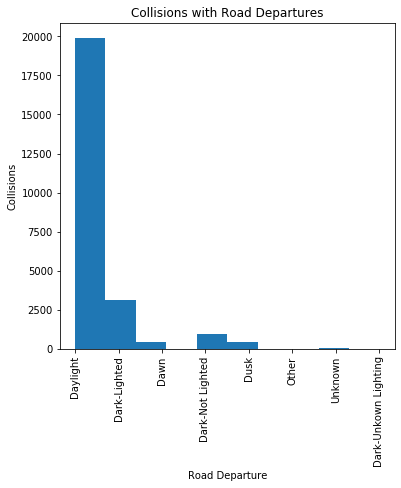

In [145]:
p = plt.hist(OKC_df['c_light_cond_cde'])
plt.xticks(rotation='vertical')
plt.rcParams["figure.figsize"] = [6, 6]
plt.title('Collisions with Road Departures')
plt.xlabel('Road Departure')
plt.ylabel('Collisions')
plt.show()

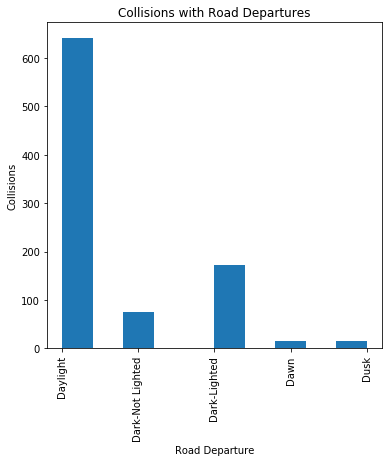

In [144]:
p = plt.hist(NOR_df['c_light_cond_cde'])
plt.xticks(rotation='vertical')
plt.rcParams["figure.figsize"] = [6, 6]
plt.title('Collisions with Road Departures')
plt.xlabel('Road Departure')
plt.ylabel('Collisions')
plt.show()

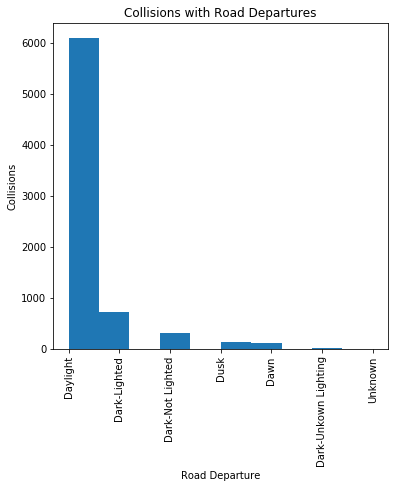

In [143]:
p = plt.hist(TUL_df['c_light_cond_cde'])
plt.xticks(rotation='vertical')
plt.rcParams["figure.figsize"] = [6, 6]
plt.title('Collisions with Road Departures')
plt.xlabel('Road Departure')
plt.ylabel('Collisions')
plt.show()

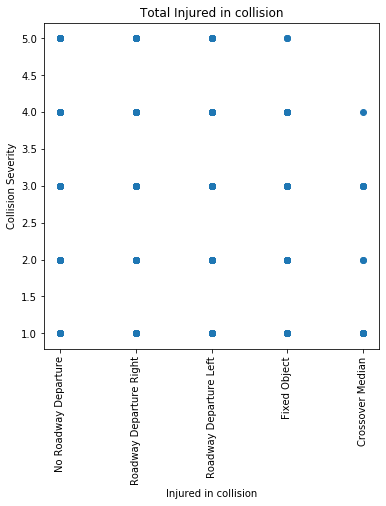

In [153]:
p = plt.scatter(OKC_df['road_depart'],OKC_df['Severity_Type'])
plt.xticks(rotation='vertical')
plt.rcParams["figure.figsize"] = [6, 6]
plt.title('Total Injured in collision')
plt.xlabel('Injured in collision')
plt.ylabel('Collision Severity')
plt.show()

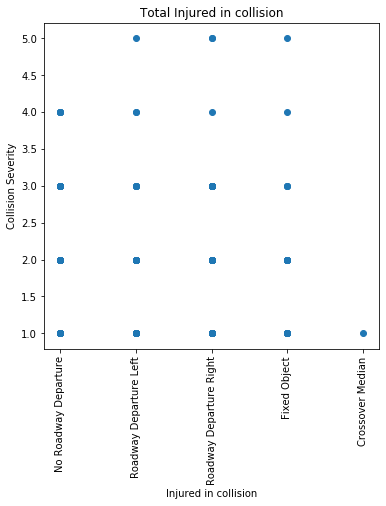

In [154]:
p = plt.scatter(NOR_df['road_depart'],NOR_df['Severity_Type'])
plt.xticks(rotation='vertical')
plt.rcParams["figure.figsize"] = [6, 6]
plt.title('Total Injured in collision')
plt.xlabel('Injured in collision')
plt.ylabel('Collision Severity')
plt.show()

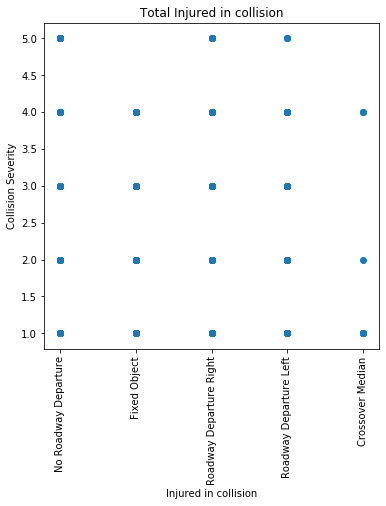

In [155]:
p = plt.scatter(TUL_df['road_depart'],TUL_df['Severity_Type'])
plt.xticks(rotation='vertical')
plt.rcParams["figure.figsize"] = [6, 6]
plt.title('Total Injured in collision')
plt.xlabel('Injured in collision')
plt.ylabel('Collision Severity')
plt.show()

Text(0, 0.5, 'collisions')

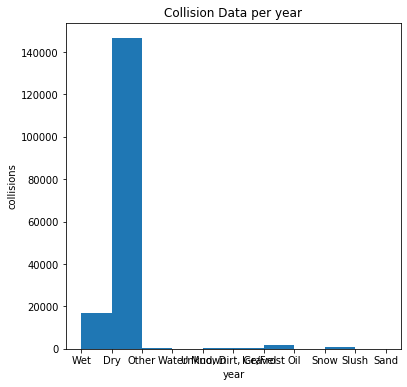

In [75]:
fig, ax = plt.subplots()

# scatter the sepal_length against the sepal_width
#ax.scatter(Newcoll['year'], Newcoll['Severity_Type'])
ax.hist(Newcoll['year'],bins=10)
# set a title and labels
ax.set_title('Collision Data per year')
ax.set_xlabel('year')
ax.set_ylabel('collisions')

Text(0, 0.5, 'collisions')

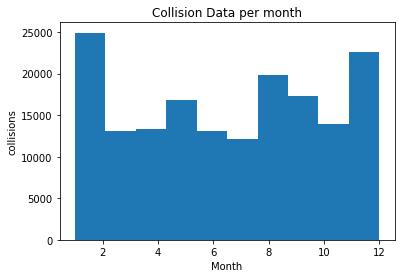

In [58]:
fig, ax = plt.subplots()
ax.hist(Newcoll['month'],bins=10)
# set a title and labels
ax.set_title('Collision Data per month')
ax.set_xlabel('Month')
ax.set_ylabel('collisions')

Text(0, 0.5, 'collisions')

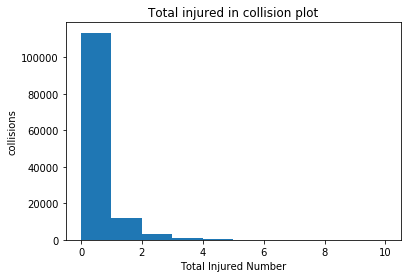

In [195]:
fig, ax = plt.subplots()
ax.hist(Newcoll['n_tot_injured_num'],bins=10)
# set a title and labels
ax.set_title('Total injured in collision plot')
ax.set_xlabel('Total Injured Number')
ax.set_ylabel('collisions')

(0, 20000)

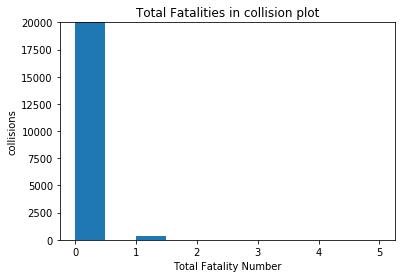

In [208]:
fig, ax = plt.subplots()
ax.hist(Newcoll['n_tot_fatalities_num'],bins=10)
# set a title and labels
ax.set_title('Total Fatalities in collision plot')
ax.set_xlabel('Total Fatality Number')
ax.set_ylabel('collisions')
ax.set_ylim(0,20000)

Text(0, 0.5, 'collisions')

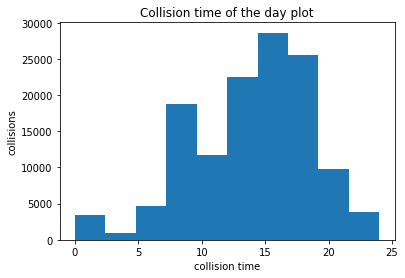

In [234]:
fig, ax = plt.subplots()
ax.hist(Newcoll['t_collision_time'],bins=10)
# set a title and labels
ax.set_title('Collision time of the day plot')
ax.set_xlabel('collision time')
ax.set_ylabel('collisions')

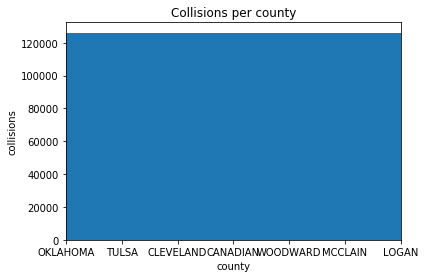

In [236]:
fig, ax = plt.subplots()
ax.hist(Newcoll['c_county_num'],bins=10)
# set a title and labels
ax.set_title('Collisions per county')
ax.set_xlabel('county')
ax.set_ylabel('collisions')
ax.set_xlim(0,6)
#ax.set_xticklabels(ax.get_xticklabels(), rotation='vertical', ha='right')
#ax.set_xticklabels(rotation=45)
ax.tick_params(axis='x', which='minor', labelsize='small', labelcolor='m', rotation=90)

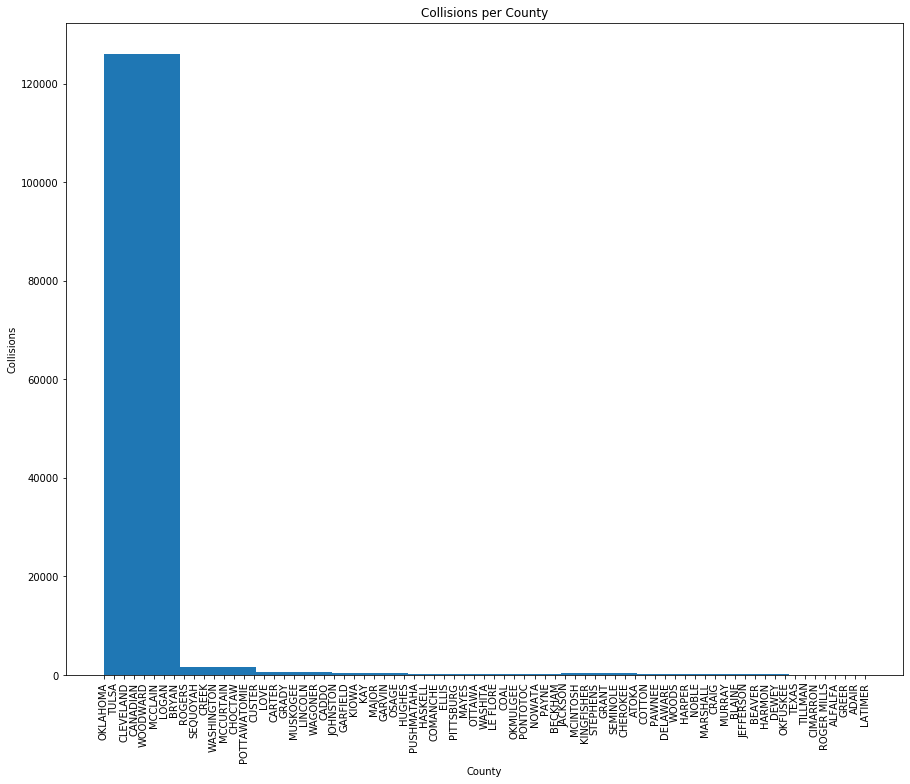

In [248]:
p = plt.hist(Newcoll['c_county_num'])
plt.xticks(rotation='vertical')
plt.rcParams["figure.figsize"] = [15, 12]
plt.title('Collisions per County')
plt.xlabel('County')
plt.ylabel('Collisions')
plt.show()

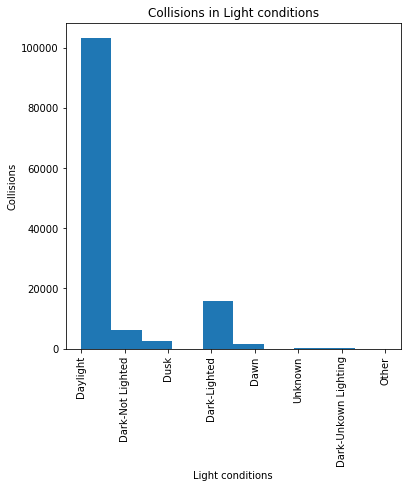

In [255]:
p = plt.hist(Newcoll['c_light_cond_cde'])
plt.xticks(rotation='vertical')
plt.rcParams["figure.figsize"] = [6, 6]
plt.title('Collisions in Light conditions')
plt.xlabel('Light conditions')
plt.ylabel('Collisions')
plt.show()

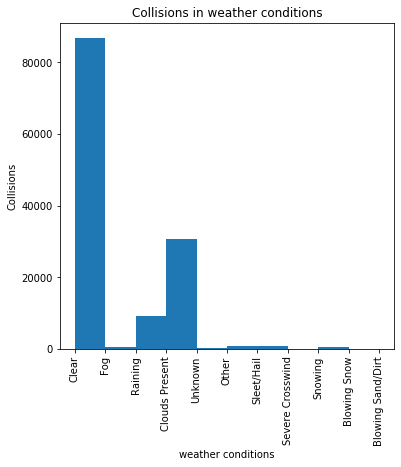

In [256]:
p = plt.hist(Newcoll['c_weather_cond_cde'])
plt.xticks(rotation='vertical')
plt.rcParams["figure.figsize"] = [6, 6]
plt.title('Collisions in weather conditions')
plt.xlabel('weather conditions')
plt.ylabel('Collisions')
plt.show()



Text(0, 0.5, 'collisions')

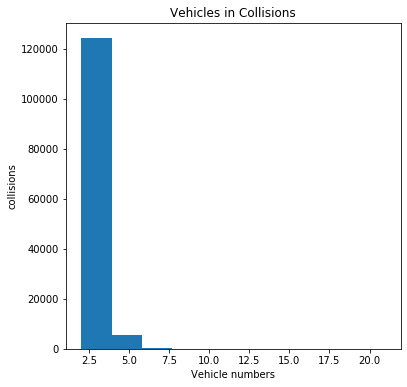

In [271]:
fig, ax = plt.subplots()
ax.hist(Newcoll['n_unit_cnt'],bins=10)
# set a title and labels
ax.set_title('Vehicles in Collisions')
ax.set_xlabel('Vehicle numbers')
ax.set_ylabel('collisions')

#ax.set_xticklabels(ax.get_xticklabels(), rotation='vertical', ha='right')
#ax.set_xticklabels(rotation=45)
#ax.tick_params(axis='x', which='minor', labelsize='small', labelcolor='m', rotation=90)


Text(0, 0.5, 'collisions')

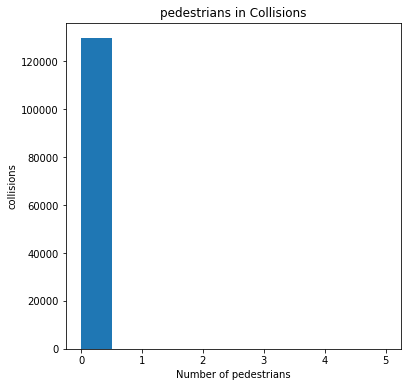

In [270]:
fig, ax = plt.subplots()
ax.hist(Newcoll['n_tot_pedestrians_num'],bins=10)
# set a title and labels
ax.set_title('pedestrians in Collisions')
ax.set_xlabel('Number of pedestrians')
ax.set_ylabel('collisions')

#ax.set_xticklabels(ax.get_xticklabels(), rotation='vertical', ha='right')
#ax.set_xticklabels(rotation=45)
#ax.tick_params(axis='x', which='minor', labelsize='small', labelcolor='m', rotation=90)

Text(0, 0.5, 'collisions')

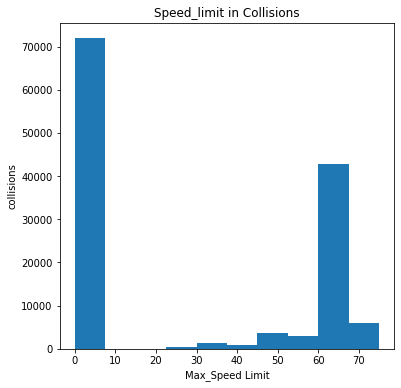

In [272]:
fig, ax = plt.subplots()
ax.hist(Newcoll['speed_limit'],bins=10)
# set a title and labels
ax.set_title('Speed_limit in Collisions')
ax.set_xlabel('Max_Speed Limit')
ax.set_ylabel('collisions')


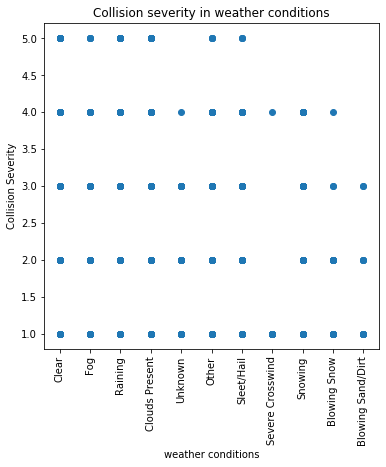

In [278]:
p = plt.scatter(Newcoll['c_weather_cond_cde'],Newcoll['Severity_Type'])
plt.xticks(rotation='vertical')
plt.rcParams["figure.figsize"] = [6, 6]
plt.title('Collision severity in weather conditions')
plt.xlabel('weather conditions')
plt.ylabel('Collision Severity')
plt.show()

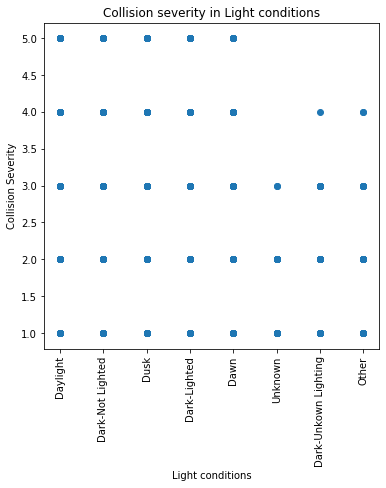

In [279]:
p = plt.scatter(Newcoll['c_light_cond_cde'],Newcoll['Severity_Type'])
plt.xticks(rotation='vertical')
plt.rcParams["figure.figsize"] = [6, 6]
plt.title('Collision severity in Light conditions')
plt.xlabel('Light conditions')
plt.ylabel('Collision Severity')
plt.show()

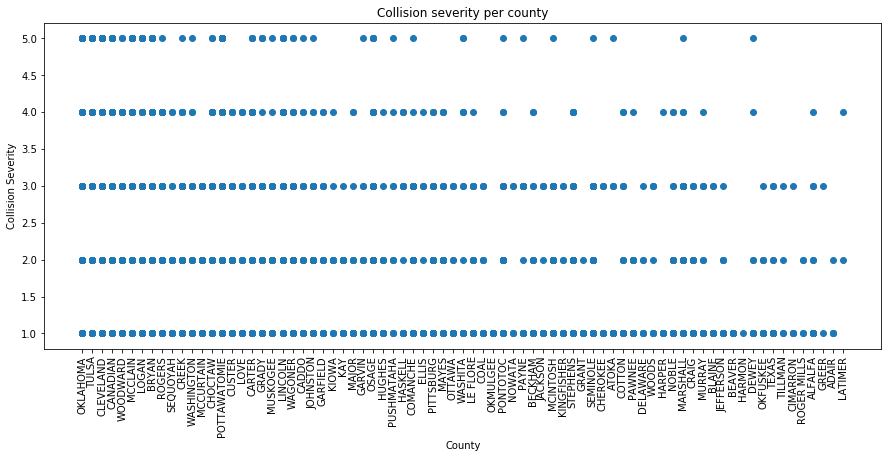

In [283]:
p = plt.scatter(Newcoll['c_county_num'],Newcoll['Severity_Type'])
plt.xticks(rotation='vertical')
plt.rcParams["figure.figsize"] = [15, 6]
plt.title('Collision severity per county')
plt.xlabel('County')
plt.ylabel('Collision Severity')
plt.show()

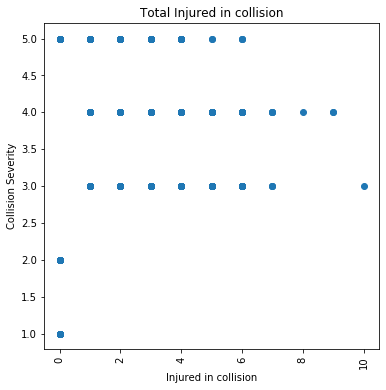

In [291]:
p = plt.scatter(Newcoll['n_tot_injured_num'],Newcoll['Severity_Type'])
plt.xticks(rotation='vertical')
plt.rcParams["figure.figsize"] = [6, 6]
plt.title('Total Injured in collision')
plt.xlabel('Injured in collision')
plt.ylabel('Collision Severity')
plt.show()

In [23]:

###### Create dummy values of categorical variables..

dummy_vhcnd=pd.get_dummies(Newcoll_n['veh1_c_vehicle_type_cde'])
Newcoll_n=pd.concat([Newcoll_n,dummy_vhcnd], axis=1)

dummy_vrdcnd=pd.get_dummies(Newcoll_n['veh1_c_roadway_cond_cde'])
Newcoll_n=pd.concat([Newcoll_n,dummy_vrdcnd], axis=1)

dummy_fcde=pd.get_dummies(Newcoll_n['c_coll_fatality_cde'])
Newcoll_n=pd.concat([Newcoll_n,dummy_fcde], axis=1)

dummy_light=pd.get_dummies(Newcoll_n['c_light_cond_cde'])
Newcoll_n=pd.concat([Newcoll_n,dummy_light], axis=1)

dummy_weath=pd.get_dummies(Newcoll_n['c_weather_cond_cde'])
Newcoll_n=pd.concat([Newcoll_n,dummy_weath], axis=1)

dummy_co=pd.get_dummies(Newcoll_n['c_county_num'])
Newcoll_n=pd.concat([Newcoll_n,dummy_co], axis=1)

dummy_ct=pd.get_dummies(Newcoll_n['dr1_person_cond_cde'])
Newcoll_n=pd.concat([Newcoll_n,dummy_ct], axis=1)

dummy_ct=pd.get_dummies(Newcoll_n['road_depart'])
Newcoll_n=pd.concat([Newcoll_n,dummy_ct], axis=1)

dummy_ct=pd.get_dummies(Newcoll_n['c_alcohol_involv_cde'])
Newcoll_n=pd.concat([Newcoll_n,dummy_ct], axis=1)

dummy_ct=pd.get_dummies(Newcoll_n['veh2_c_roadway_cond_cde'])
Newcoll_n=pd.concat([Newcoll_n,dummy_ct], axis=1)

dummy_ct=pd.get_dummies(Newcoll_n['t_city_nme'])
Newcoll_n=pd.concat([Newcoll_n,dummy_ct], axis=1)

Newcoll_n=Newcoll_n.drop(['t_city_nme','c_city_num','veh2_c_roadway_cond_cde','c_alcohol_involv_cde','road_depart','dr1_person_cond_cde','veh1_c_vehicle_type_cde', 'veh1_c_roadway_cond_cde','c_coll_fatality_cde','c_light_cond_cde','c_weather_cond_cde','c_county_num'], axis=1)



In [43]:

###### Create dummy values of categorical variables..

dummy_vhcnd=pd.get_dummies(Newcoll_n['veh1_c_vehicle_type_cde'])
Newcoll_n=pd.concat([Newcoll_n,dummy_vhcnd], axis=1)

dummy_vrdcnd=pd.get_dummies(Newcoll_n['veh1_c_roadway_cond_cde'])
Newcoll_n=pd.concat([Newcoll_n,dummy_vrdcnd], axis=1)

dummy_fcde=pd.get_dummies(Newcoll_n['c_coll_fatality_cde'])
Newcoll_n=pd.concat([Newcoll_n,dummy_fcde], axis=1)

dummy_light=pd.get_dummies(Newcoll_n['c_light_cond_cde'])
Newcoll_n=pd.concat([Newcoll_n,dummy_light], axis=1)

dummy_weath=pd.get_dummies(Newcoll_n['c_weather_cond_cde'])
Newcoll_n=pd.concat([Newcoll_n,dummy_weath], axis=1)

dummy_co=pd.get_dummies(Newcoll_n['c_county_num'])
Newcoll_n=pd.concat([Newcoll_n,dummy_co], axis=1)

dummy_ct=pd.get_dummies(Newcoll_n['c_city_num'])
Newcoll_n=pd.concat([Newcoll_n,dummy_ct], axis=1)


Newcoll_n=Newcoll_n.drop(['veh1_c_vehicle_type_cde', 'veh1_c_roadway_cond_cde','c_coll_fatality_cde','c_light_cond_cde','c_weather_cond_cde','c_county_num','c_city_num'], axis=1)


Newcoll_n.head()

,c_document_id,n_tot_vehicles_num,n_tot_injured_num,n_tot_fatalities_num,t_collision_time,n_dst_ew_frm_cty_num,n_dst_frm_locatn_num,c_wrk_zne_type_cde,c_wrk_zne_loc_cde,c_locality_class_cde,...,SENTINEL,SHARON,SILO,SKIATOOK,THE VILLAGE,VALLEY BROOK,VERDIGRIS,WARR ACRES,WARWICK,WOODWARD
2,300430481,2,0,0,18.06,0,288,0.0,0.0,2,...,0,0,0,1,0,0,0,0,0,0
4,300430478,2,0,0,15.34,0,50,2.0,3.0,5,...,0,0,0,1,0,0,0,0,0,0
6,300430473,2,0,0,0.29,0,0,0.0,0.0,2,...,0,0,0,1,0,0,0,0,0,0
11,300430468,2,0,0,11.30,0,0,0.0,0.0,2,...,0,0,0,0,0,0,0,0,0,0
16,300430463,2,0,0,16.25,0,0,0.0,0.0,2,...,0,0,0,0,0,0,0,0,0,0


In [43]:
Newcoll_n = Newcoll_n.drop(['n_latitude_num', 'n_longitude_num','derived_lat', 'derived_lon'], axis=1)

In [26]:
Newcoll_n = Newcoll_n.drop(['c_document_id'], axis=1)
len(Newcoll_n)

10146

In [56]:
#########Seective features
Newcoll_n=Newcoll_n[['c_highway_class_cde', 'n_tot_fatalities_num', 'day', 'derived_lat', 'derived_lon', 'speed_limit', 'N','Y','month', 'year', 'c_special_feat1_cde', 'c_special_feat2_cde', 'n_tot_poss_injured_num', 'n_tot_inc_injured_num', 'n_tot_non_inc_injured_num', 'n_tot_injured_num','Severity_Type']]

In [103]:
from sklearn.model_selection import train_test_split

X=Newcoll_n.drop('Severity_Type', axis=1)
y=Newcoll_n['Severity_Type']

######## Split data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)


(9131, 1015, 9131, 1015)

## Model implemnetation

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score

import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)
sel.get_support()
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)
print(selected_feat)
pd.Series(sel.estimator_,feature_importances_,ravel()).hist()

Index(['c_document_id', 'n_tot_vehicles_num', 'n_tot_injured_num',
       'n_tot_fatalities_num', 't_collision_time', 'n_dst_frm_locatn_num',
       'c_locality_class_cde', 'n_latitude_num', 'n_longitude_num',
       'c_day_of_week_cde', 'c_highway_class_cde', 'n_tot_occupants_num',
       'c_report_agency_cde', 'c_manner_coll_cde', 'n_contact_vehl_num',
       'c_special_feat1_cde', 'c_special_feat2_cde', 'n_unit_cnt',
       'n_person_cnt', 'c_quadrant', 'c_collision_type', 'type_coll',
       'veh2_c_vehicle_type_cde', 'veh1_c_unsafe_unlaw_cde',
       'veh2_c_unsafe_unlaw_cde', 'veh1_c_first_contact_cde',
       'veh2_c_first_contact_cde', 'veh1_c_veh_going_todo_cde',
       'veh2_c_veh_going_todo_cde', 'veh1_c_veh_did_cde', 'veh2_c_veh_did_cde',
       'veh1_n_legal_speed_num', 'veh2_n_legal_speed_num',
       'veh1_c_road_grade_cde', 'veh2_c_road_grade_cde',
       'veh1_c_roadway_type_cde', 'veh2_c_roadway_type_cde',
       'n_tot_poss_injured_num', 'n_tot_non_inc_injured_num',


NameError: name 'feature_importances_' is not defined

In [75]:
Newcoll_n=Newcoll_n.drop(['derived_lat','derived_lon','c_city_num'], axis=1)

In [ ]:
import seaborn as sns
corrmat = Newcoll_n.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

#plot heat map
g=sns.heatmap(Newcoll_n[top_corr_features].corr(),annot=True,cmap="RdYlGn")

,c_highway_class_cde,n_tot_fatalities_num,day,derived_lat,derived_lon,speed_limit,N,Y,month,year,c_special_feat1_cde,c_special_feat2_cde,n_tot_poss_injured_num,n_tot_inc_injured_num,n_tot_non_inc_injured_num,n_tot_injured_num,Severity_Type
c_highway_class_cde,1.000000,-0.015391,0.012190,-0.105560,0.116029,-0.445830,0.008589,-0.008589,-0.024890,0.026079,-0.019256,0.133435,0.011236,0.013669,0.029584,0.031885,0.027898
n_tot_fatalities_num,-0.015391,1.000000,0.017998,0.025099,-0.027979,0.075822,-0.939470,0.939470,-0.068766,-0.170757,-0.061827,-0.066544,-0.020360,0.047810,-0.005903,0.024298,0.345181
day,0.012190,0.017998,1.000000,0.034080,-0.033172,0.009772,-0.024078,0.024078,0.092267,-0.070102,-0.085720,-0.072648,0.017161,0.033243,0.042429,0.054003,0.088623
derived_lat,-0.105560,0.025099,0.034080,1.000000,-0.998360,0.260483,-0.024299,0.024299,-0.063949,-0.110796,-0.338786,-0.434827,0.099593,0.083410,0.094789,0.126193,0.215052
derived_lon,0.116029,-0.027979,-0.033172,-0.998360,1.000000,-0.270365,0.027183,-0.027183,0.063961,0.101657,0.337120,0.434150,-0.100553,-0.077307,-0.091751,-0.120068,-0.208522
speed_limit,-0.445830,0.075822,0.009772,0.260483,-0.270365,1.000000,-0.071886,0.071886,-0.006585,-0.056471,-0.094362,-0.320520,-0.007286,0.023307,-0.026364,-0.006885,0.022679
N,0.008589,-0.939470,-0.024078,-0.024299,0.027183,-0.071886,1.000000,-1.000000,0.071269,0.181535,0.072033,0.070593,0.020548,-0.044777,0.001236,-0.026179,-0.367421
Y,-0.008589,0.939470,0.024078,0.024299,-0.027183,0.071886,-1.000000,1.000000,-0.071269,-0.181535,-0.072033,-0.070593,-0.020548,0.044777,-0.001236,0.026179,0.367421
month,-0.024890,-0.068766,0.092267,-0.063949,0.063961,-0.006585,0.071269,-0.071269,1.000000,0.031879,0.161834,0.166548,0.038541,-0.183834,-0.219769,-0.286784,-0.343474
year,0.026079,-0.170757,-0.070102,-0.110796,0.101657,-0.056471,0.181535,-0.181535,0.031879,1.000000,0.234620,0.215417,0.073680,-0.633849,-0.025864,-0.405165,-0.604530


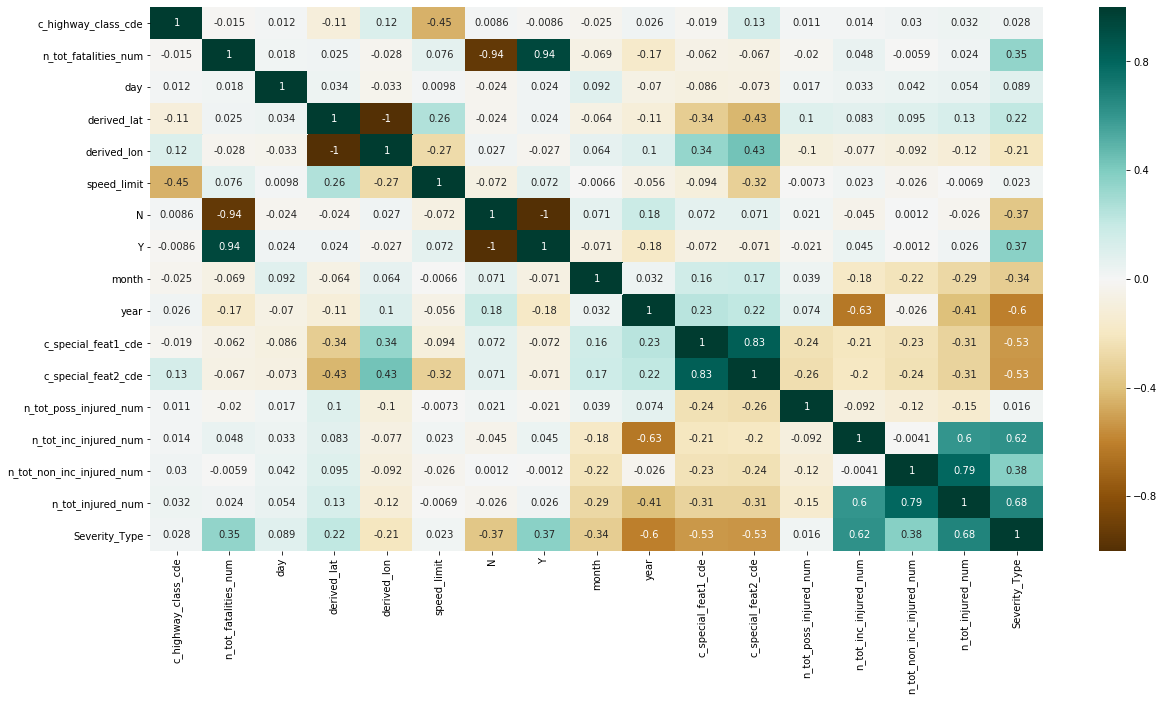

In [365]:
import seaborn as sns

Newcoll_n.head()
plt.figure(figsize=(20,10))
c= Newcoll_n.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

In [33]:
import seaborn as sns

#sns.pairplot(Newcoll_n)
y_train.value_counts()
Newcoll_n.head()

,c_document_id,n_tot_vehicles_num,n_tot_fatalities_num,c_county_num,c_city_num,n_unit_cnt,n_person_cnt,c_collision_type,type_coll,speed_limit,Severity_Type
0,300430484,1,0,57,0,2,2,20.0,46,65,1
2,300430481,2,0,55,70,2,3,2.0,1,60,1
3,300430479,1,0,67,0,2,4,20.0,44,65,1
4,300430478,2,0,55,70,2,3,2.0,1,60,1
6,300430473,2,0,55,70,2,5,1.0,3,0,1


In [48]:
############ Model building

###### Logistic regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score


model = LogisticRegression().fit(X_train, y_train)
Y_Pred=model.predict(X_test)
Y_Pred
model.score(X_test, y_test)

confusion_matrix = confusion_matrix(y_test, Y_Pred,labels=[0.0,1.0,2.0,3.0])
print(confusion_matrix)
print(classification_report(y_test, Y_Pred))
model.score(X_test, y_test)

print("Accuracy:",accuracy_score(y_test, Y_Pred))
df=pd.DataFrame(list(zip(y_test, Y_Pred)), 
               columns =['true', 'pred'])

df

[[  0   0   0   0]
 [  0 249  48  13]
 [  0  48 208  32]
 [  0  13  77 159]]
              precision    recall  f1-score   support

           1       0.75      0.74      0.74       337
           2       0.52      0.64      0.58       324
           3       0.47      0.52      0.49       305
           4       0.32      0.23      0.27       264
           5       0.00      0.00      0.00        33

    accuracy                           0.54      1263
   macro avg       0.41      0.43      0.42      1263
weighted avg       0.51      0.54      0.52      1263

Accuracy: 0.5360253365003959


C:\Users\meera\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\meera\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,true,pred
0,3,4
1,4,2
2,3,3
3,3,3
4,3,1
...,...,...
1258,1,1
1259,1,1
1260,3,1
1261,5,1


In [389]:
pd.crosstab(y_test, Y_Pred)

col_0,1,2,3,4
Severity_Type,,,,
1,249,48,13,27
2,48,208,32,36
3,13,77,159,56
4,15,61,127,61
5,9,4,7,13


In [23]:
######## Neural network
#from numpy import loadtxt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical


y_train = to_categorical(y_train)
y_train.shape



## keras model
model = Sequential()
model.add(Dense(30, input_dim=16, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(6, activation='softmax'))

## compile the keras model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## fit the keras model on the dataset
model.fit(X_train, y_train, epochs=150, batch_size=10, verbose=0)

## make class predictions with the model
predictions = model.predict_classes(X_test)

## summarize the first 5 cases
#for i in range(5):
#    print('%s => %d (expected %d)' % (X_test[i].tolist(), predictions[i], y_test[i:i+1]))

C:\Users\meera\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\meera\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\meera\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\meera\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passi

ValueError: Error when checking input: expected dense_1_input to have shape (16,) but got array with shape (389,)

In [369]:
y_test = to_categorical(y_test)
score=model.evaluate(X_test, y_test, batch_size=128)
model.metrics_names, score

1263/1263 [==============================] - 0s 179us/step


(['loss', 'acc'], [16.11809904501727, 0.0])

In [370]:
predictions = model.predict_classes(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(y_test, predictions))
df=pd.DataFrame(list(zip(y_test, predictions)), 
               columns =['true', 'pred'])

df

ValueError: Classification metrics can't handle a mix of multilabel-indicator and binary targets

In [69]:
Newcoll_n =Newcoll_n[['n_tot_injured_num','month','year','c_special_feat1_cde','c_special_feat2_cde','day','derived_lat','derived_lon','c_city_num','Severity_Type']]


In [92]:
Newcoll_n.columns

Index(['c_county_num', 'veh1_c_vehicle_type_cde', 'veh1_c_roadway_cond_cde',
       'c_light_cond_cde', 'c_weather_cond_cde', 'n_unit_cnt', 'n_person_cnt',
       'n_tot_pedestrians_num', 'n_tot_vehicles_num', 'c_day_of_week_cde',
       'dr1_person_cond_cde', 'road_depart', 'veh2_c_roadway_cond_cde',
       't_collision_time', 'c_alcohol_involv_cde', 'c_coll_fatality_cde',
       't_city_nme', 'c_special_feat1_cde', 'c_special_feat2_cde', 'day',
       'month', 'year', 'Severity_Type'],
      dtype='object')

In [24]:
############ Model building

###### Logistic regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score


model = LogisticRegression().fit(X_train, y_train)
Y_Pred=model.predict(X_test)
Y_Pred
model.score(X_test, y_test)

confusion_matrix = confusion_matrix(y_test, Y_Pred,labels=[0.0,1.0,2.0,3.0])
print(confusion_matrix)
print(classification_report(y_test, Y_Pred))
model.score(X_test, y_test)

print("Accuracy:",accuracy_score(y_test, Y_Pred))
df=pd.DataFrame(list(zip(y_test, Y_Pred)), 
               columns =['true', 'pred'])

df

ValueError: bad input shape (11358, 6)

In [69]:
######## Neural network
#from numpy import loadtxt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.layers import Dropout

y_train = to_categorical(y_train)
y_train.shape



## keras model
model = Sequential()
model.add(Dense(150, input_dim=18, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

## compile the keras model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## fit the keras model on the dataset
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)

## make class predictions with the model
predictions = model.predict_classes(X_test)

## summarize the first 5 cases
#for i in range(5):
#    print('%s => %d (expected %d)' % (X_test[i].tolist(), predictions[i], y_test[i:i+1]))

In [32]:
predictions = model.predict_classes(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(y_test, predictions))
df=pd.DataFrame(list(zip(y_test, predictions)), 
               columns =['true', 'pred'])

df

Accuracy: 0.31527093596059114


,true,pred
0,3,2
1,2,2
2,1,2
3,1,2
4,3,2
...,...,...
1010,3,2
1011,2,2
1012,1,2
1013,1,2


In [70]:
pd.crosstab(y_test, predictions)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.33      1.00      0.49       330
           2       0.00      0.00      0.00       320
           3       0.00      0.00      0.00       291
           4       0.00      0.00      0.00        56
           5       0.00      0.00      0.00        18

    accuracy                           0.33      1015
   macro avg       0.07      0.20      0.10      1015
weighted avg       0.11      0.33      0.16      1015



C:\Users\meera\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [71]:
prob=model.predict_proba(X_test)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, predictions, pos_label=2)
auc = roc_auc_score(y_test, prob[:,1])
print('AUC: %.3f' % auc)

ValueError: multi_class must be in ('ovo', 'ovr')

In [141]:
prob[:,1]

array([0.25155032, 0.25155032, 0.25155032, ..., 0.25155032, 0.25155032,
       0.25155032], dtype=float32)

In [72]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

multiclass_roc_auc_score(y_test, predictions, average="macro")

NameError: name 'LabelBinarizer' is not defined

In [123]:
print(classification_report(y_test, predictions))
pd.crosstab(y_test, predictions)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       337
           2       0.00      0.00      0.00       324
           3       0.24      1.00      0.39       305
           4       0.00      0.00      0.00       264
           5       0.00      0.00      0.00        33

    accuracy                           0.24      1263
   macro avg       0.05      0.20      0.08      1263
weighted avg       0.06      0.24      0.09      1263



C:\Users\meera\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


col_0,3
Severity_Type,
1,337
2,324
3,305
4,264
5,33


In [37]:
########## K-Nearest Neighbor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score
KNN_model = KNeighborsClassifier(n_neighbors=4)
KNN_model.fit(X_train, y_train)
Y_Pred=KNN_model.predict(X_test)


df=pd.DataFrame(list(zip(y_test, Y_Pred)), 
               columns =['true', 'pred'])

print(classification_report(y_test, Y_Pred))
df, KNN_model.score(X_test, y_test)


              precision    recall  f1-score   support

           1       0.74      0.93      0.83       330
           2       0.63      0.71      0.67       320
           3       0.73      0.59      0.66       291
           4       0.17      0.02      0.03        56
           5       0.00      0.00      0.00        18

    accuracy                           0.70      1015
   macro avg       0.45      0.45      0.44      1015
weighted avg       0.66      0.70      0.67      1015



C:\Users\meera\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(      true  pred
 0        3     2
 1        2     1
 2        1     1
 3        1     1
 4        3     3
 ...    ...   ...
 1010     3     3
 1011     2     1
 1012     1     1
 1013     1     1
 1014     2     1
 
 [1015 rows x 2 columns], 0.6975369458128079)

In [29]:
pd.crosstab(y_test, Y_Pred)

col_0,1,2,3,4
Severity_Type,,,,
1,307,22,1,0
2,78,227,15,0
3,22,91,173,5
4,4,14,37,1
5,3,5,10,0


In [63]:
from sklearn.ensemble import RandomForestClassifier
RSEED = 50
model = RandomForestClassifier(n_estimators=11, 
                               random_state=RSEED, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)

model.fit(X_train, y_train)
Y_Pred=model.predict(X_test)

df=pd.DataFrame(list(zip(y_test, Y_Pred)), 
               columns =['true', 'pred'])

print(classification_report(y_test, Y_Pred))
df, model.score(X_test, y_test)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  11 out of  11 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  11 out of  11 | elapsed:    0.0s finished


              precision    recall  f1-score   support

           1       0.92      0.99      0.95       330
           2       0.99      0.91      0.95       320
           3       0.96      1.00      0.98       291
           4       1.00      0.79      0.88        56
           5       1.00      0.94      0.97        18

    accuracy                           0.96      1015
   macro avg       0.97      0.93      0.95      1015
weighted avg       0.96      0.96      0.96      1015



(      true  pred
 0        3     3
 1        2     2
 2        1     1
 3        1     1
 4        3     3
 ...    ...   ...
 1010     3     3
 1011     2     2
 1012     1     1
 1013     1     1
 1014     2     2
 
 [1015 rows x 2 columns], 0.9576354679802955)

In [94]:
pd.crosstab(y_test, Y_Pred)

col_0,1,2,3,4,5
Severity_Type,,,,,
1,328,2,0,0,0
2,28,292,0,0,0
3,0,0,291,0,0
4,0,0,12,44,0
5,1,0,0,0,17


In [115]:
frame = pd.DataFrame(X_test)
frame['Predicted Severity'] = Y_Pred
frame['Collision Severity'] = y_test
#frame['cluster'].value_counts()
frame.tail(10)

,c_county_num,veh1_c_vehicle_type_cde,veh1_c_roadway_cond_cde,c_light_cond_cde,c_weather_cond_cde,n_unit_cnt,n_person_cnt,n_tot_pedestrians_num,n_tot_vehicles_num,c_day_of_week_cde,...,c_alcohol_involv_cde,c_coll_fatality_cde,t_city_nme,c_special_feat1_cde,c_special_feat2_cde,day,month,year,Predicted Severity,Collision Severity
19385,CLEVELAND,Passenger Van,Dry,Dark-Lighted,Clear,2,4,0.0,2,5,...,N,N,NORMAN,0.0,0.0,21,8,2019,1,1
15286,CANADIAN,Motorcycle,Dry,Daylight,Clouds Present,3,5,0.0,2,7,...,N,N,OKLAHOMA CITY,1.0,0.0,11,9,2019,3,3
4699,OKLAHOMA,Sport Utility Vehicle (SUV),Dry,Daylight,Clear,2,4,0.0,2,3,...,N,N,OKLAHOMA CITY,20.0,0.0,21,11,2019,1,1
4154,OKLAHOMA,Pickup Truck,Dry,Daylight,Clouds Present,2,2,0.0,2,6,...,N,N,OKLAHOMA CITY,5.0,0.0,2,12,2019,1,1
8504,OKLAHOMA,Passenger Vehicle-4 Door,Dry,Dark-Lighted,Clear,2,3,0.0,2,7,...,N,N,OKLAHOMA CITY,41.0,0.0,26,10,2019,1,1
208768,TULSA,Sport Utility Vehicle (SUV),Dry,Daylight,Clear,2,3,0.0,2,2,...,N,N,TULSA,0.0,0.0,19,5,2014,3,3
21758,OKLAHOMA,Passenger Vehicle-4 Door,Dry,Daylight,Clear,3,5,0.0,3,4,...,Y,N,OKLAHOMA CITY,20.0,0.0,6,8,2019,2,2
2727,OKLAHOMA,Passenger Vehicle-4 Door,Dry,Daylight,Clear,3,7,0.0,3,2,...,N,N,OKLAHOMA CITY,0.0,0.0,16,12,2019,1,1
9082,OKLAHOMA,Passenger Vehicle-4 Door,Dry,Daylight,Clouds Present,2,4,0.0,2,3,...,N,N,OKLAHOMA CITY,72.0,0.0,22,10,2019,1,1
5278,OKLAHOMA,Passenger Vehicle-4 Door,Dry,Daylight,Clear,3,7,0.0,3,2,...,N,N,OKLAHOMA CITY,0.0,0.0,21,11,2019,2,2


In [110]:
len(y_test)

1015

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score

########## SVM 
SVM_model = svm.LinearSVC()
SVM_model.fit(X_train, y_train)
Y_Pred=SVM_model.predict(X_test)
SVM_model.score(X_test, y_test)

df=pd.DataFrame(list(zip(y_test, Y_Pred)), 
               columns =['true', 'pred'])

print(classification_report(y_test, Y_Pred))
df,SVM_model.score(X_test, y_test)


from sklearn.svm import SVC 
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 
Y_Pred = svm_model_linear.predict(X_test) 
  
# model accuracy for X_test   
accuracy = svm_model_linear.score(X_test, y_test) 
  
# creating a confusion matrix 
#cm = confusion_matrix(y_test, svm_predictions) 
df=pd.DataFrame(list(zip(y_test, Y_Pred)), 
               columns =['true', 'pred'])

print(classification_report(y_test, Y_Pred))
df,svm_model_linear.score(X_test, y_test)

C:\Users\meera\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\meera\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.76      0.25      0.38       330
           2       0.39      1.00      0.56       320
           3       0.85      0.17      0.29       291
           4       0.94      0.30      0.46        56
           5       0.00      0.00      0.00        18

    accuracy                           0.46      1015
   macro avg       0.59      0.35      0.34      1015
weighted avg       0.66      0.46      0.41      1015

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       330
           2       1.00      1.00      1.00       320
           3       1.00      1.00      1.00       291
           4       1.00      1.00      1.00        56
           5       1.00      1.00      1.00        18

    accuracy                           1.00      1015
   macro avg       1.00      1.00      1.00      1015
weighted avg       1.00      1.00      1.00      1015



(      true  pred
 0        3     3
 1        2     2
 2        1     1
 3        1     1
 4        3     3
 ...    ...   ...
 1010     3     3
 1011     2     2
 1012     1     1
 1013     1     1
 1014     2     2
 
 [1015 rows x 2 columns], 1.0)

In [61]:
df=pd.DataFrame(list(zip(y_test, Y_Pred)), 
               columns =['Actual Severity', 'Predicted Severity'])
print(classification_report(y_test, Y_Pred))
df,svm_model_linear.score(X_test, y_test)

              precision    recall  f1-score   support

           1       0.76      0.92      0.83        71
           2       0.73      0.86      0.79        91
           3       0.66      0.74      0.70        88
           4       0.85      0.51      0.64        86
           5       0.00      0.00      0.00         8

    accuracy                           0.73       344
   macro avg       0.60      0.60      0.59       344
weighted avg       0.73      0.73      0.72       344



C:\Users\meera\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(     Actual Severity  Predicted Severity
 0                  2                   2
 1                  5                   4
 2                  2                   2
 3                  4                   4
 4                  3                   3
 ..               ...                 ...
 339                4                   2
 340                1                   1
 341                2                   1
 342                1                   1
 343                1                   1
 
 [344 rows x 2 columns], 0.9912790697674418)

In [66]:
pd.crosstab(y_test, Y_Pred)

col_0,1,2,3,4,5
Severity_Type,,,,,
1,330,0,0,0,0
2,0,320,0,0,0
3,0,0,291,0,0
4,0,0,0,56,0
5,0,0,0,0,18


In [320]:
len(X_test.columns)

183

In [317]:
import scikitplot as skplt
import matplotlib.pyplot as plt

#y_true = # ground truth labels
#y_probas = # predicted probabilities generated by sklearn classifier
skplt.metrics.plot_roc_curve(y_test, Y_Pred)
plt.show()

C:\Users\meera\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


IndexError: too many indices for array

In [114]:
pd.concat([X_test, df], axis=1, sort=False,  ignore_index=True)

,0,1,2,3,4,5,6,7,8,9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...
246191,6.0,2.0,2013.0,0.0,0.0,4.0,NaN,NaN,NaN,NaN
247074,1.0,1.0,2013.0,0.0,0.0,22.0,NaN,NaN,NaN,NaN
247319,1.0,8.0,2015.0,5.0,0.0,4.0,NaN,NaN,NaN,NaN
247852,2.0,1.0,2013.0,0.0,0.0,7.0,NaN,NaN,NaN,NaN


In [74]:
Newcoll_n.columns

Index(['c_highway_class_cde', 'n_tot_fatalities_num', 'day', 'derived_lat',
       'derived_lon', 'speed_limit', 'N', 'N', 'Y', 'Y', 'month', 'year',
       'c_special_feat1_cde', 'c_special_feat2_cde', 'n_tot_poss_injured_num',
       'n_tot_inc_injured_num', 'n_tot_non_inc_injured_num',
       'n_tot_injured_num', 'Severity_Type'],
      dtype='object')

In [397]:
import reverse_geocoder
tuple([np.array(Newcoll_n['derived_lat'])[12620],np.array(Newcoll_n['derived_lon'])[12620]])
#tuple([1,2])
#len(Newcoll_n)

lstc=[]
for i in range (0, len(Newcoll_n)):
    coordinates=tuple([np.array(Newcoll_n['derived_lat'])[i],np.array(Newcoll_n['derived_lon'])[i]])
    t=reverse_geocoder.search(coordinates)
    lstc.append(t[0]['name'])

lstc

def extractDigits(lst): 
    return [[el] for el in lst] 
                  
# Driver code 
print(extractDigits(lstc)) 
lstc_n=extractDigits(lstc)


import csv
with open('protagonist.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(lstc_n)

Loading formatted geocoded file...


KeyboardInterrupt: 

In [127]:
k = pd.read_csv('Weather_n.csv',header=None)
ls=k[0].tolist()
new_items = [('NRMN' if x=='Norman' else ('OKCE' if x=='Oklahoma City' else ('TULN' if x=='Tulsa' else x))) for x in ls]
Newcoll_n['city']=new_items
len(Newcoll_n),Newcoll_n.head()

(12621,
     c_document_id c_coll_fatality_cde  n_tot_vehicles_num  n_tot_injured_num  \
 2       300430481                   N                   2                  0   
 4       300430478                   N                   2                  0   
 6       300430473                   N                   2                  0   
 11      300430468                   N                   2                  0   
 16      300430463                   N                   2                  0   
 
     n_tot_fatalities_num  t_collision_time c_county_num c_city_num  \
 2                      0             18.06     OKLAHOMA   SKIATOOK   
 4                      0             15.34     OKLAHOMA   SKIATOOK   
 6                      0              0.29     OKLAHOMA   SKIATOOK   
 11                     0             11.30        TULSA     COLONY   
 16                     0             16.25        TULSA     COLONY   
 
     n_dst_ew_frm_cty_num  n_dst_frm_locatn_num  ...  derived_lon  acog  \
 

In [128]:
Newcoll_n.head()

,c_document_id,c_coll_fatality_cde,n_tot_vehicles_num,n_tot_injured_num,n_tot_fatalities_num,t_collision_time,c_county_num,c_city_num,n_dst_ew_frm_cty_num,n_dst_frm_locatn_num,...,derived_lon,acog,speed_limit,traffic_sgl,tribal,cross_center,day,month,year,city
2,300430481,N,2,0,0,18.06,OKLAHOMA,SKIATOOK,0,288,...,-97.490534,1,60,99,31,0,3,1,2020,OKCE
4,300430478,N,2,0,0,15.34,OKLAHOMA,SKIATOOK,0,50,...,-97.531310,1,60,99,31,0,3,1,2020,Nichols Hills
6,300430473,N,2,0,0,0.29,OKLAHOMA,SKIATOOK,0,0,...,0.000000,1,0,99,99,0,3,1,2020,Takoradi
11,300430468,N,2,0,0,11.30,TULSA,COLONY,0,0,...,-95.920273,0,0,99,16,0,3,1,2020,TULN
16,300430463,N,2,0,0,16.25,TULSA,COLONY,0,0,...,-95.958224,0,0,99,3,0,3,1,2020,TULN


In [129]:
weather = pd.read_csv('C:/Users/meera/Downloads/Pracicum_2020/New/Mesonet_weather_n.csv')

weather.rename(columns = {'YEAR':'year'}, inplace = True) 
weather.rename(columns = {'MONTH':'month'}, inplace = True)
weather.rename(columns = {'DAY':'day'}, inplace = True)
weather.rename(columns = {'STID':'city'}, inplace = True)
weather.year.unique()


array([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], dtype=int64)

In [130]:
#Newcoll_t['city_n'].unique()

N_df=pd.merge(Newcoll_n, weather, how="inner", on=['year','month','day','city'])
N_df.tail(100)
#pd.merge(Newcoll_n, weather, on='city') #on=['year','month','day','city'])

#N_df=N_df[['n_tot_injured_num','month','year','c_special_feat1_cde', 'c_special_feat2_cde','day','city','TMAX','TMIN','HMAX','HMIN','HAVG','WSPD','RAIN','RNUM','RMAX','Severity_Type']]
N_df=N_df[['c_highway_class_cde', 'n_tot_fatalities_num', 'day', 'derived_lat', 'derived_lon', 'speed_limit', 'month', 'year', 'c_special_feat1_cde', 'c_special_feat2_cde', 'n_tot_poss_injured_num', 'n_tot_inc_injured_num', 'n_tot_non_inc_injured_num', 'n_tot_injured_num','city','TMAX','TMIN','HMAX','HMIN','HAVG','WSPD','RAIN','RNUM','RMAX','Severity_Type']]
N_df.head()


,c_highway_class_cde,n_tot_fatalities_num,day,derived_lat,derived_lon,speed_limit,month,year,c_special_feat1_cde,c_special_feat2_cde,...,TMAX,TMIN,HMAX,HMIN,HAVG,WSPD,RAIN,RNUM,RMAX,Severity_Type
0,6.0,0,27,35.425039,-97.601016,0,12,2019,80.0,99.0,...,53.73,36.17,92.53,74.26,83.74,5.79,0.0,0.0,0.0,1
1,6.0,0,27,35.478608,-97.565600,0,12,2019,80.0,99.0,...,53.73,36.17,92.53,74.26,83.74,5.79,0.0,0.0,0.0,1
2,6.0,0,27,35.491985,-97.547694,0,12,2019,80.0,99.0,...,53.73,36.17,92.53,74.26,83.74,5.79,0.0,0.0,0.0,1
3,2.0,0,27,35.448632,-97.486941,60,12,2019,0.0,0.0,...,53.73,36.17,92.53,74.26,83.74,5.79,0.0,0.0,0.0,1
4,2.0,0,27,35.403604,-97.576795,60,12,2019,72.0,0.0,...,53.73,36.17,92.53,74.26,83.74,5.79,0.0,0.0,0.0,1


In [131]:
N_df['city'] = N_df['city'].astype('category')
dummy_ct=pd.get_dummies(N_df['city'])
N_df=pd.concat([N_df,dummy_ct], axis=1)
N_df=N_df.drop(['city'],axis=1)

In [132]:
N_df.head(100)

,c_highway_class_cde,n_tot_fatalities_num,day,derived_lat,derived_lon,speed_limit,month,year,c_special_feat1_cde,c_special_feat2_cde,...,HMIN,HAVG,WSPD,RAIN,RNUM,RMAX,Severity_Type,NRMN,OKCE,TULN
0,6.0,0,27,35.425039,-97.601016,0,12,2019,80.0,99.0,...,74.26,83.74,5.79,0.0,0.0,0.0,1,0,1,0
1,6.0,0,27,35.478608,-97.565600,0,12,2019,80.0,99.0,...,74.26,83.74,5.79,0.0,0.0,0.0,1,0,1,0
2,6.0,0,27,35.491985,-97.547694,0,12,2019,80.0,99.0,...,74.26,83.74,5.79,0.0,0.0,0.0,1,0,1,0
3,2.0,0,27,35.448632,-97.486941,60,12,2019,0.0,0.0,...,74.26,83.74,5.79,0.0,0.0,0.0,1,0,1,0
4,2.0,0,27,35.403604,-97.576795,60,12,2019,72.0,0.0,...,74.26,83.74,5.79,0.0,0.0,0.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,6.0,0,16,35.481260,-97.528967,0,12,2019,80.0,99.0,...,81.83,87.52,10.43,0.0,0.0,0.0,1,0,1,0
96,2.0,0,16,35.473580,-97.579023,60,12,2019,0.0,0.0,...,81.83,87.52,10.43,0.0,0.0,0.0,1,0,1,0
97,2.0,0,16,35.410734,-97.577968,60,12,2019,0.0,0.0,...,81.83,87.52,10.43,0.0,0.0,0.0,1,0,1,0
98,6.0,0,16,35.472569,-97.510461,0,12,2019,99.0,80.0,...,81.83,87.52,10.43,0.0,0.0,0.0,1,0,1,0


In [133]:
from sklearn.model_selection import train_test_split

X=N_df.drop('Severity_Type', axis=1)
y=N_df['Severity_Type']

######## Split data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)


(3095, 344, 3095, 344)

In [134]:
########## SVM 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score

SVM_model = svm.LinearSVC()
SVM_model.fit(X_train, y_train)
Y_Pred=SVM_model.predict(X_test)
SVM_model.score(X_test, y_test)

df=pd.DataFrame(list(zip(y_test, Y_Pred)), 
               columns =['true', 'pred'])

print(classification_report(y_test, Y_Pred))
df,SVM_model.score(X_test, y_test)


from sklearn.svm import SVC 
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 
Y_Pred = svm_model_linear.predict(X_test) 
  
# model accuracy for X_test   
accuracy = svm_model_linear.score(X_test, y_test) 
  
# creating a confusion matrix 
#cm = confusion_matrix(y_test, svm_predictions) 
df=pd.DataFrame(list(zip(y_test, Y_Pred)), 
               columns =['true', 'pred'])

print(classification_report(y_test, Y_Pred))
df,svm_model_linear.score(X_test, y_test)

C:\Users\meera\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\meera\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.97      0.52      0.68        71
           2       0.34      1.00      0.50        91
           3       0.88      0.08      0.15        88
           4       1.00      0.31      0.48        86
           5       0.00      0.00      0.00         8

    accuracy                           0.47       344
   macro avg       0.64      0.38      0.36       344
weighted avg       0.76      0.47      0.43       344

              precision    recall  f1-score   support

           1       0.99      1.00      0.99        71
           2       0.98      1.00      0.99        91
           3       1.00      1.00      1.00        88
           4       1.00      0.99      0.99        86
           5       1.00      0.75      0.86         8

    accuracy                           0.99       344
   macro avg       0.99      0.95      0.97       344
weighted avg       0.99      0.99      0.99       344



(     true  pred
 0       2     2
 1       5     5
 2       2     2
 3       4     4
 4       3     3
 ..    ...   ...
 339     4     4
 340     1     1
 341     2     2
 342     1     1
 343     1     1
 
 [344 rows x 2 columns], 0.9912790697674418)

In [135]:
pd.crosstab(y_test, Y_Pred)

col_0,1,2,3,4,5
Severity_Type,,,,,
1,71,0,0,0,0
2,0,91,0,0,0
3,0,0,88,0,0
4,1,0,0,85,0
5,0,2,0,0,6


In [136]:
########## K-Nearest Neighbor
KNN_model = KNeighborsClassifier(n_neighbors=3)
KNN_model.fit(X_train, y_train)
Y_Pred=KNN_model.predict(X_test)


df=pd.DataFrame(list(zip(y_test, Y_Pred)), 
               columns =['true', 'pred'])

print(classification_report(y_test, Y_Pred))
df, KNN_model.score(X_test, y_test)

              precision    recall  f1-score   support

           1       0.76      0.92      0.83        71
           2       0.73      0.86      0.79        91
           3       0.66      0.74      0.70        88
           4       0.85      0.51      0.64        86
           5       0.00      0.00      0.00         8

    accuracy                           0.73       344
   macro avg       0.60      0.60      0.59       344
weighted avg       0.73      0.73      0.72       344



C:\Users\meera\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(     true  pred
 0       2     2
 1       5     4
 2       2     2
 3       4     4
 4       3     3
 ..    ...   ...
 339     4     2
 340     1     1
 341     2     1
 342     1     1
 343     1     1
 
 [344 rows x 2 columns], 0.7325581395348837)

In [137]:
pd.crosstab(y_test, Y_Pred)

col_0,1,2,3,4
Severity_Type,,,,
1,65,6,0,0
2,8,78,4,1
3,6,15,65,2
4,7,7,28,44
5,0,1,2,5


In [138]:
from sklearn.ensemble import RandomForestClassifier
RSEED = 50
model = RandomForestClassifier(n_estimators=100, 
                               random_state=RSEED, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)

model.fit(X_train, y_train)
Y_Pred=model.predict(X_test)

df=pd.DataFrame(list(zip(y_test, Y_Pred)), 
               columns =['true', 'pred'])

print(classification_report(y_test, Y_Pred))
df, model.score(X_test, y_test)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        71
           2       0.98      1.00      0.99        91
           3       1.00      1.00      1.00        88
           4       1.00      1.00      1.00        86
           5       1.00      0.75      0.86         8

    accuracy                           0.99       344
   macro avg       1.00      0.95      0.97       344
weighted avg       0.99      0.99      0.99       344



(     true  pred
 0       2     2
 1       5     5
 2       2     2
 3       4     4
 4       3     3
 ..    ...   ...
 339     4     4
 340     1     1
 341     2     2
 342     1     1
 343     1     1
 
 [344 rows x 2 columns], 0.9941860465116279)

In [140]:
pd.crosstab(y_test, Y_Pred)

col_0,1,2,3,4,5
Severity_Type,,,,,
1,71,0,0,0,0
2,0,91,0,0,0
3,0,0,88,0,0
4,0,0,0,86,0
5,0,2,0,0,6


In [158]:
weather.loc[weather['city'] == 'TULN']

,year,month,day,city,TMAX,TMIN,HMAX,HMIN,HAVG,WSPD,RAIN,RNUM,RMAX
2,2012,1,1,TULN,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.0,-999.00
5,2012,1,2,TULN,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.0,-999.00
8,2012,1,3,TULN,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.0,-999.00
11,2012,1,4,TULN,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.0,-999.00
14,2012,1,5,TULN,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.0,-999.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8756,2019,12,28,TULN,63.43,48.58,97.28,81.88,93.58,7.57,1.32,53.0,2.28
8759,2019,12,29,TULN,52.97,38.79,91.62,56.70,73.31,10.63,0.00,0.0,0.00
8762,2019,12,30,TULN,47.64,34.21,71.56,38.46,56.10,10.92,0.00,0.0,0.00
8765,2019,12,31,TULN,51.01,30.05,70.30,26.50,47.58,7.38,0.00,0.0,0.00


Text(0, 0.5, 'city')

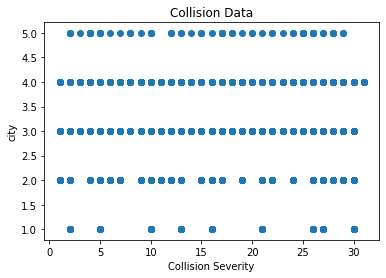

In [31]:
fig, ax = plt.subplots()

# scatter the sepal_length against the sepal_width
ax.scatter(N_df['day'], N_df['Severity_Type'])
# set a title and labels
ax.set_title('Collision Data')
ax.set_xlabel('Collision Severity')
ax.set_ylabel('city')

In [32]:
from sklearn.cluster import DBSCAN
DB_clust=DBSCAN(eps=0.2, min_samples=3).fit(N_df)
labels=DB_clust.labels_
print(labels[20:40])
#coll['DB_Clust']=labels

r_clustnum = len(set(labels))-(1 if -1 in labels else 0)
clusternum=len(set(labels))
set(labels), r_clustnum, clusternum

[ 1  0  1 -1  3  3 -1 -1  3  3 -1 -1 -1 -1  4  5  5 -1  5  5]


({-1,
  0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157

In [35]:
Newcoll_n.head()

,c_coll_fatality_cde,n_tot_vehicles_num,n_tot_injured_num,n_tot_fatalities_num,t_collision_time,c_county_num,c_city_num,n_dst_ew_frm_cty_num,n_dst_frm_locatn_num,c_wrk_zne_type_cde,...,derived_lon,acog,speed_limit,traffic_sgl,tribal,cross_center,day,month,year,city
2,N,2,0,0,18.06,OKLAHOMA,SKIATOOK,0,288,0.0,...,-97.490534,1,60,99,31,0,3,1,2020,OKCE
4,N,2,0,0,15.34,OKLAHOMA,SKIATOOK,0,50,2.0,...,-97.531310,1,60,99,31,0,3,1,2020,Nichols Hills
6,N,2,0,0,0.29,OKLAHOMA,SKIATOOK,0,0,0.0,...,0.000000,1,0,99,99,0,3,1,2020,Takoradi
11,N,2,0,0,11.30,TULSA,COLONY,0,0,0.0,...,-95.920273,0,0,99,16,0,3,1,2020,TULN
16,N,2,0,0,16.25,TULSA,COLONY,0,0,0.0,...,-95.958224,0,0,99,3,0,3,1,2020,TULN


In [141]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(N_df)

km = KMeans(n_clusters=4,random_state=0)
km.fit(X_std)
km1=km.fit_predict(X_std)
labels=km.labels_
print(km.labels_)
for i in km1:
    print(i)
    


[3 3 3 ... 0 2 2]
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
3
2
2
2
2
2
2
2
2
2
2
2
2
0
3
3
0
3
3
3
3
0
0
0
3
3
3
0
3
3
0
3
3
3
3
3
0
0
0
3
0
3
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
3
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
2
2
2
2
3
2
3
3
3
3
3
3
3
3
3
3
2
2
2
2
3
3
3
3
2
2
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
0
3
3
0
0
0
3
0
3
3
3
3
3
0
3
3
0
0
3
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
3
3
3
2
3
3
2
2
3
3
2
2
2
2
2
2
2
2
2
3
2
2
3
3
2
3
3
3
3
2
2
3
2
3
3
2
3
2
3
2
3
2
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
0
3
3
0
3
3
0
3
0
0
3
3
3
3
3
0
0
3
0
3
3
0
0
3
3
3
3
3
3
0
3
0
3
3
3
3
3
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
3
3
3
3
3
3
3
3
2
2
2
2
2
3
3
3
2
2
3
2
2
2
3
3
2
3
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
0
3
3
3
0
3
3
3
3
3
3
3
3
3
3
0
3
0
3
3
0
0
0
0
0
0
0
0
3
3
0
3
3
3
0
3
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
3
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
2
2
2
2
3
2
3
3
3
2
2
3
3
3
3
3
3
3
3
3


In [44]:
N_df.head()

,c_highway_class_cde,n_tot_fatalities_num,day,derived_lat,derived_lon,speed_limit,month,year,c_special_feat1_cde,c_special_feat2_cde,...,HMIN,HAVG,WSPD,RAIN,RNUM,RMAX,Severity_Type,NRMN,OKCE,TULN
0,6.0,0,27,35.425039,-97.601016,0,12,2019,80.0,99.0,...,74.26,83.74,5.79,0.0,0.0,0.0,1,0,1,0
1,6.0,0,27,35.478608,-97.565600,0,12,2019,80.0,99.0,...,74.26,83.74,5.79,0.0,0.0,0.0,1,0,1,0
2,6.0,0,27,35.491985,-97.547694,0,12,2019,80.0,99.0,...,74.26,83.74,5.79,0.0,0.0,0.0,1,0,1,0
3,2.0,0,27,35.448632,-97.486941,60,12,2019,0.0,0.0,...,74.26,83.74,5.79,0.0,0.0,0.0,1,0,1,0
4,2.0,0,27,35.403604,-97.576795,60,12,2019,72.0,0.0,...,74.26,83.74,5.79,0.0,0.0,0.0,1,0,1,0


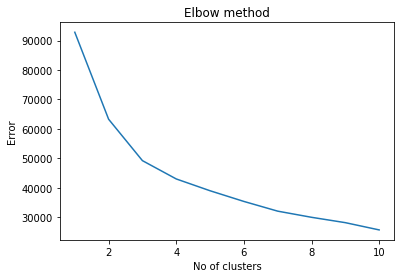

In [142]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(X_std)
    kmeans.fit(X_std)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [143]:
km = KMeans(n_clusters=4,max_iter=600, algorithm = 'auto',random_state=0, init='k-means++')
km.fit(X_std)
km1=km.fit_predict(X_std)
labels=km.labels_
print(km.labels_)
for i in km1:
    print(i)

[3 3 3 ... 0 2 2]
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
3
2
2
2
2
2
2
2
2
2
2
2
2
0
3
3
0
3
3
3
3
0
0
0
3
3
3
0
3
3
0
3
3
3
3
3
0
0
0
3
0
3
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
3
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
2
2
2
2
3
2
3
3
3
3
3
3
3
3
3
3
2
2
2
2
3
3
3
3
2
2
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
0
3
3
0
0
0
3
0
3
3
3
3
3
0
3
3
0
0
3
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
3
3
3
2
3
3
2
2
3
3
2
2
2
2
2
2
2
2
2
3
2
2
3
3
2
3
3
3
3
2
2
3
2
3
3
2
3
2
3
2
3
2
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
0
3
3
0
3
3
0
3
0
0
3
3
3
3
3
0
0
3
0
3
3
0
0
3
3
3
3
3
3
0
3
0
3
3
3
3
3
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
3
3
3
3
3
3
3
3
2
2
2
2
2
3
3
3
2
2
3
2
2
2
3
3
2
3
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
0
3
3
3
0
3
3
3
3
3
3
3
3
3
3
0
3
0
3
3
0
0
0
0
0
0
0
0
3
3
0
3
3
3
0
3
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
3
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
2
2
2
2
3
2
3
3
3
2
2
3
3
3
3
3
3
3
3
3


In [144]:
pred = km.predict(X_std)

frame = pd.DataFrame(N_df)
frame['cluster'] = pred
frame['cluster'].value_counts()

0    1596
2    1482
3     320
1      41
Name: cluster, dtype: int64

In [186]:
km.cluster_centers_
N_df.head(100)

,n_tot_fatalities_num,Severity_Type,NRMN,OKCE,TULN,cluster
0,0,1,0,1,0,0
1,0,1,0,1,0,0
2,0,1,0,1,0,0
3,0,1,0,1,0,0
4,0,1,0,1,0,0
...,...,...,...,...,...,...
95,0,1,0,1,0,0
96,0,1,0,1,0,0
97,0,1,0,1,0,0
98,0,1,0,1,0,0


In [191]:
N_df.loc[N_df['cluster']==0]

,n_tot_fatalities_num,Severity_Type,NRMN,OKCE,TULN,cluster
0,0,1,0,1,0,0
1,0,1,0,1,0,0
2,0,1,0,1,0,0
3,0,1,0,1,0,0
4,0,1,0,1,0,0
...,...,...,...,...,...,...
3433,1,5,0,1,0,0
3434,1,5,0,1,0,0
3435,1,5,0,0,1,0
3436,1,5,0,0,1,0


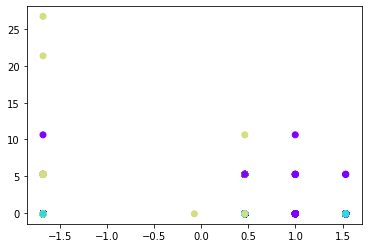

In [145]:
plt.scatter(X_std[:,0],X_std[:,1], c=km1, cmap='rainbow')

In [83]:
N_df=N_df.drop('cluster', axis=1)

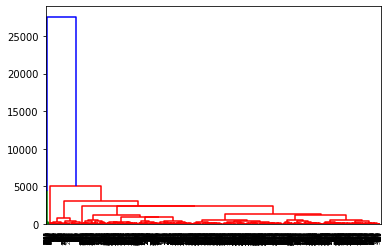

In [146]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

dendrogram =sch.dendrogram(sch.linkage(N_df, method='ward'))

model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
model.fit(N_df)
labels = model.labels_

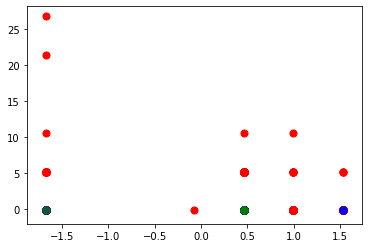

In [147]:
plt.scatter(X_std[labels==0, 0], X_std[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X_std[labels==1, 0], X_std[labels==1, 1], s=50, marker='o', color='blue',alpha=0.8)
plt.scatter(X_std[labels==2, 0], X_std[labels==2, 1], s=50, marker='o', color='green',alpha=0.4)
plt.scatter(X_std[labels==3, 0], X_std[labels==3, 1], s=50, marker='o', color='purple',alpha=0.09)
#plt.scatter(X_std[labels==4, 0], X_std[labels==4, 1], s=50, marker='o', color='orange',alpha=0.2)
plt.show()

[8.49982279e-02 2.92852161e-03 9.67966280e-02 6.94842404e-03
 5.67802828e-03 2.86243073e-05 4.47542360e-03 1.12911458e-03
 1.05074970e-03 4.93637158e-03 8.56445321e-04 1.05273215e-02
 1.02371004e-02 1.05493088e-03 5.03781624e-03 6.85415635e-03
 5.49536614e-03 1.43352769e-04 1.80724416e-03 4.24780744e-03
 5.72081252e-03 3.00538085e-03 2.85910938e-04 5.23318352e-02
 6.35360132e-02 6.13185766e-03 6.02391654e-03 1.65743047e-03
 1.36741951e-02 5.53653686e-03 4.36505129e-03 1.51272821e-03
 4.83454485e-03 5.15462697e-03 2.86679723e-03 4.49501098e-03
 4.53311112e-03 4.19404866e-03 3.81717401e-03 4.32392385e-03
 3.98651697e-03 3.52687541e-03 3.45430047e-03 5.17326172e-03
 5.20701775e-03 2.70131491e-03 2.46486832e-03 1.54789686e-03
 1.42227994e-03 4.73436035e-03 4.60756830e-03 1.56627238e-03
 1.22754463e-03 6.87473790e-02 9.18429502e-02 8.22837725e-02
 1.42647390e-04 3.51422383e-03 5.24633958e-03 4.64049733e-03
 8.14595893e-03 9.79355033e-03 2.38081325e-03 1.11721377e-02
 4.80434767e-03 5.106510

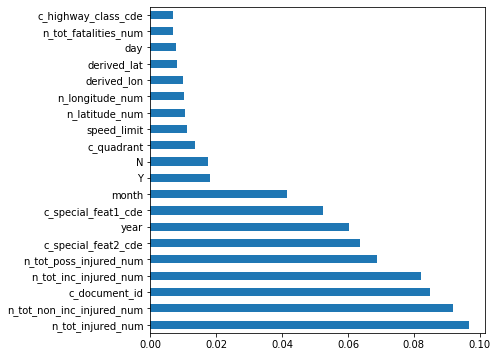

Num Features: 3
Selected Features: [ True False  True False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False Fal

In [348]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE

model = ExtraTreesClassifier()
model.fit(X_train,y_train)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()


rfe = RFE(model, 3)
fit = rfe.fit(X_train,y_train)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

In [148]:
N_df.columns

Index(['c_highway_class_cde', 'n_tot_fatalities_num', 'day', 'derived_lat',
       'derived_lon', 'speed_limit', 'month', 'year', 'c_special_feat1_cde',
       'c_special_feat2_cde', 'n_tot_poss_injured_num',
       'n_tot_inc_injured_num', 'n_tot_non_inc_injured_num',
       'n_tot_injured_num', 'TMAX', 'TMIN', 'HMAX', 'HMIN', 'HAVG', 'WSPD',
       'RAIN', 'RNUM', 'RMAX', 'Severity_Type', 'NRMN', 'OKCE', 'TULN',
       'cluster'],
      dtype='object')

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassfier
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)
sel.get_support()
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)
print(selected_feat)
pd.series(sel.estimator_,feature_importances_,.ravel()).hist()

In [156]:
#N_df=N_df.drop(['derived_lon','derived_lat','TMAX', 'TMIN', 'HMAX', 'HMIN', 'HAVG', 'WSPD',
#       'RAIN', 'RNUM', 'RMAX', 'n_tot_poss_injured_num', 'n_tot_inc_injured_num', 'n_tot_non_inc_injured_num'], axis=1)

N_df=N_df[['n_tot_fatalities_num', 'Severity_Type', 'NRMN', 'OKCE', 'TULN']]

In [179]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(N_df)

km = KMeans(n_clusters=3,random_state=0)
km.fit(X_std)
km1=km.fit_predict(X_std)
labels=km.labels_
print(km.labels_)
for i in km1:
    print(i)
    


[0 0 0 ... 0 0 2]
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


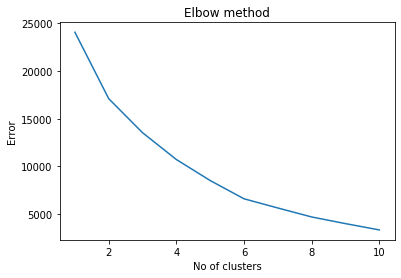

In [151]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(X_std)
    kmeans.fit(X_std)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

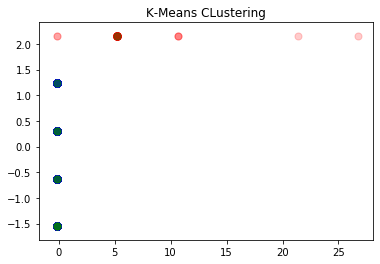

In [195]:
plt.scatter(X_std[labels==0, 0], X_std[labels==0, 1], s=50, marker='o', color='red', alpha=0.2)
plt.scatter(X_std[labels==1, 0], X_std[labels==1, 1], s=50, marker='o', color='blue',alpha=0.4)
plt.scatter(X_std[labels==2, 0], X_std[labels==2, 1], s=50, marker='o', color='green',alpha=0.2)
plt.scatter(X_std[labels==3, 0], X_std[labels==3, 1], s=50, marker='o', color='purple',alpha=0.3)
#plt.scatter(X_std[labels==4, 0], X_std[labels==4, 1], s=50, marker='o', color='orange',alpha=0.2)
plt.title("K-Means CLustering")
plt.show()

In [21]:
weather = pd.read_csv('C:/Users/meera/Downloads/Pracicum_2020/New/Mesonet_weather.csv')

weather.tail()

,YEAR,MONTH,DAY,STID,TMAX,TMIN,TAVG,DMAX,DMIN,DAVG,...,HAVG,VDEF,9AVG,HTMX,WCMN,2MAX,2MIN,2AVG,PMAXO,PMINO
361,2019,12,28,NRMN,60.04,46.78,56.27,58.76,43.62,54.06,...,92.31,1.19,56.85,-996.0,43.44,18.66,3.08,8.78,1,202
362,2019,12,29,NRMN,46.81,32.61,39.73,43.46,25.12,30.74,...,71.67,2.49,40.62,-996.0,24.86,15.06,2.34,7.74,288,1
363,2019,12,30,NRMN,49.01,29.77,37.01,26.62,17.55,22.58,...,58.84,3.54,38.50,-996.0,21.78,15.01,0.00,6.81,284,14
364,2019,12,31,NRMN,52.39,25.57,38.17,24.80,12.41,19.65,...,51.87,4.59,39.74,-996.0,18.06,9.66,0.00,3.80,127,288
365,2020,1,1,NRMN,55.90,34.64,45.27,41.54,21.83,30.92,...,57.77,4.56,45.85,-996.0,28.49,18.66,2.51,9.42,1,277


In [45]:
#for i in collision.columns:
#    print(i)

#collision.c_weather_cond_cde.unique() #c_coll_fatality_cde  #veh1_c_vehicle_type_cde #c_light_cond_cde
Newcoll.c_city_num.unique()
#collision.tail(5)
Newcoll_n.head()
#'c_intersect_type_cde'

,c_document_id,n_tot_vehicles_num,n_tot_injured_num,n_tot_fatalities_num,t_collision_time,c_county_num,c_city_num,n_dst_ew_frm_cty_num,n_dst_frm_locatn_num,c_wrk_zne_type_cde,...,derived_lat,derived_lon,acog,speed_limit,traffic_sgl,tribal,cross_center,day,month,year
2,300430481,2,0,0,18.06,55,70,0,288,0.0,...,35.456979,-97.490534,1,60,99,31,0,3,1,2020
4,300430478,2,0,0,15.34,55,70,0,50,2.0,...,35.524833,-97.531310,1,60,99,31,0,3,1,2020
6,300430473,2,0,0,0.29,55,70,0,0,0.0,...,0.000000,0.000000,1,0,99,99,0,3,1,2020
11,300430468,2,0,0,11.30,72,50,0,0,0.0,...,36.133344,-95.920273,0,0,99,16,0,3,1,2020
16,300430463,2,0,0,16.25,72,50,0,0,0.0,...,36.178373,-95.958224,0,0,99,3,0,3,1,2020


datetime.datetime(2020, 3, 23, 19, 35, 37, 58700)